<div style="border-radius: 10px; background-color: #A478B8">
    <h1 style="color: white; padding: 1rem">LOAD LIBRARIES</h1>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler,OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
import random
SEED =2024
random.seed(SEED)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, cross_validate
from collections import Counter
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTENC
from scipy import stats
from sklearn.metrics import roc_curve, auc, precision_recall_curve, f1_score, roc_auc_score, make_scorer, confusion_matrix
from imblearn.metrics import sensitivity_score,specificity_score
from sklearn.model_selection import cross_val_score, cross_validate
from collections import Counter
import scipy.stats as stat
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
import random
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score,accuracy_score,f1_score, cohen_kappa_score
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.svm import SVC
from collections import Counter
from sklearn.model_selection import train_test_split
import os
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
import pickle
from imblearn.pipeline import Pipeline, make_pipeline


<div style="border-radius: 10px; background-color: #A478B8">
    <h1 style="color: white; padding: 1rem">Load the dataset and Understanding Data</h1>
</div>

In [2]:
data = pd.read_csv("data_science_competition_2024.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            100000 non-null  int64  
 1   loan_id               100000 non-null  object 
 2   gender                100000 non-null  object 
 3   disbursemet_date      100000 non-null  object 
 4   currency              100000 non-null  object 
 5   country               99900 non-null   object 
 6   sex                   100000 non-null  object 
 7   is_employed           100000 non-null  bool   
 8   job                   95864 non-null   object 
 9   location              99405 non-null   object 
 10  loan_amount           100000 non-null  float64
 11  number_of_defaults    100000 non-null  int64  
 12  outstanding_balance   100000 non-null  float64
 13  interest_rate         100000 non-null  float64
 14  age                   100000 non-null  int64  
 15  n

In [4]:
data.describe(include = 'all')

,Unnamed: 0,loan_id,gender,disbursemet_date,currency,country,sex,is_employed,job,location,...,number_of_defaults,outstanding_balance,interest_rate,age,number_of_defaults.1,remaining term,salary,marital_status,age.1,Loan Status
count,100000.000000,100000,100000,100000,100000,99900,100000,100000,95864,99405,...,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000,100000.000000,100000,100000.00000,100000
unique,NaN,100000,3,1461,2,3,3,2,11,157,...,NaN,NaN,NaN,NaN,NaN,262,NaN,4,NaN,2
top,NaN,8d05de78-ff32-46b1-aeb5-b3190f9c158a,male,2020 09 24,USD,Zimbabwe,male,True,Engineer,Harare,...,NaN,NaN,NaN,NaN,NaN,51,NaN,married,NaN,Did not default
freq,NaN,1,35028,103,99980,99787,35028,95864,16524,8338,...,NaN,NaN,NaN,NaN,NaN,3329,NaN,44710,NaN,85134
mean,49999.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.441970,36964.909763,0.210435,43.57069,0.441970,NaN,2781.804324,NaN,43.57069,NaN
std,28867.657797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.688286,10014.758477,0.018725,4.86376,0.688286,NaN,696.450055,NaN,4.86376,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.100000,21.00000,0.000000,NaN,250.000000,NaN,21.00000,NaN
25%,24999.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,29625.227472,0.200000,40.00000,0.000000,NaN,2273.929349,NaN,40.00000,NaN
50%,49999.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,35063.852394,0.210000,44.00000,0.000000,NaN,2665.441567,NaN,44.00000,NaN
75%,74999.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,42133.388817,0.220000,47.00000,1.000000,NaN,3146.577655,NaN,47.00000,NaN


In [5]:
data.columns

Index(['Unnamed: 0', 'loan_id', 'gender', 'disbursemet_date', 'currency',
       'country', 'sex', 'is_employed', 'job', 'location', 'loan_amount',
       'number_of_defaults', 'outstanding_balance', 'interest_rate', 'age',
       'number_of_defaults.1', 'remaining term', 'salary', 'marital_status',
       'age.1', 'Loan Status'],
      dtype='object')

In [6]:
data.head(5)

,Unnamed: 0,loan_id,gender,disbursemet_date,currency,country,sex,is_employed,job,location,...,number_of_defaults,outstanding_balance,interest_rate,age,number_of_defaults.1,remaining term,salary,marital_status,age.1,Loan Status
0,0,8d05de78-ff32-46b1-aeb5-b3190f9c158a,female,2022 10 29,USD,Zimbabwe,female,True,Teacher,Beitbridge,...,0,48653.011473,0.22,37,0,47,3230.038869,married,37,Did not default
1,1,368bf756-fcf2-4822-9612-f445d90b485b,other,2020 06 06,USD,Zimbabwe,other,True,Teacher,Harare,...,2,28752.062237,0.20,43,2,62,3194.139103,single,43,Did not default
2,2,6e3be39e-49b5-45b5-aab6-c6556de53c6f,other,2023 09 29,USD,Zimbabwe,other,True,Nurse,Gweru,...,1,44797.554126,0.22,43,1,57,3330.826656,married,43,Did not default
3,3,191c62f8-2211-49fe-ba91-43556b307871,female,2022 06 22,USD,Zimbabwe,female,True,Doctor,Rusape,...,0,35681.496413,0.23,47,0,42,2246.797020,divorced,47,Did not default
4,4,477cd8a1-3b01-4623-9318-8cd6122a8346,male,2023 02 08,USD,Zimbabwe,male,True,Nurse,Chipinge,...,0,34156.055882,0.20,42,0,45,2310.858441,married,42,Did not default


In [7]:
## checking for missing values within the dataset's variables
data.isnull().sum()

Unnamed: 0                 0
loan_id                    0
gender                     0
disbursemet_date           0
currency                   0
country                  100
sex                        0
is_employed                0
job                     4136
location                 595
loan_amount                0
number_of_defaults         0
outstanding_balance        0
interest_rate              0
age                        0
number_of_defaults.1       0
remaining term             0
salary                     0
marital_status             0
age.1                      0
Loan Status                0
dtype: int64

<div style="border-radius: 10px; background-color: blue">
    <h1 style="color: white; padding: 1rem">DATA CLEANING</h1>
</div>



<a id="inspect"></a>
<h3 name='libraries'>   
      <font color = purple >
            <span style='font-family:Georgia'>
         DROP UNNECESSARY COLUMNS
            </span>   
        </font>    
</h3>


In [8]:
### drop the unnamed column as it contains the dataset's index
data.drop('Unnamed: 0', axis=1, inplace =True)

In [9]:
## after checking the structure of the dataset through  head, info and describe it is clear that the age and number of defaults 
## are duplicated but this time different names so lets drop them
data.drop(['number_of_defaults.1','age.1'], axis=1, inplace=True)

In [10]:
data.head(3)

,loan_id,gender,disbursemet_date,currency,country,sex,is_employed,job,location,loan_amount,number_of_defaults,outstanding_balance,interest_rate,age,remaining term,salary,marital_status,Loan Status
0,8d05de78-ff32-46b1-aeb5-b3190f9c158a,female,2022 10 29,USD,Zimbabwe,female,True,Teacher,Beitbridge,39000.0,0,48653.011473,0.22,37,47,3230.038869,married,Did not default
1,368bf756-fcf2-4822-9612-f445d90b485b,other,2020 06 06,USD,Zimbabwe,other,True,Teacher,Harare,27000.0,2,28752.062237,0.20,43,62,3194.139103,single,Did not default
2,6e3be39e-49b5-45b5-aab6-c6556de53c6f,other,2023 09 29,USD,Zimbabwe,other,True,Nurse,Gweru,35000.0,1,44797.554126,0.22,43,57,3330.826656,married,Did not default


<a id="inspect"></a>
<h3 name='libraries'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            RECODE CATEGORICAL VARIABLES
            </span>   
        </font>    
</h3>


<h4>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
            GENDER 
            </span>   
        </font>    
</h4>

In [11]:
# now lets recode the categorical variables 
# first we will start with gender since it has no missing values
# lets check its elements first
column_gender = 'gender'
print(data[column_gender].describe())
print(data[column_gender].unique())


count     100000
unique         3
top         male
freq       35028
Name: gender, dtype: object
['female' 'other' 'male']


In [12]:
## So the columns contains 3 unique data elements namely female, other and male
## so we will recode this variable such that female=0, male=1 and other =2

def recoded_gender(gender):
    if gender == 'female':
        return 0
    elif gender == 'male':
        return 1
    elif gender =='other':
        return 2

data['gender'] = data['gender'].apply(recoded_gender)

In [13]:
data.head(3)

,loan_id,gender,disbursemet_date,currency,country,sex,is_employed,job,location,loan_amount,number_of_defaults,outstanding_balance,interest_rate,age,remaining term,salary,marital_status,Loan Status
0,8d05de78-ff32-46b1-aeb5-b3190f9c158a,0,2022 10 29,USD,Zimbabwe,female,True,Teacher,Beitbridge,39000.0,0,48653.011473,0.22,37,47,3230.038869,married,Did not default
1,368bf756-fcf2-4822-9612-f445d90b485b,2,2020 06 06,USD,Zimbabwe,other,True,Teacher,Harare,27000.0,2,28752.062237,0.20,43,62,3194.139103,single,Did not default
2,6e3be39e-49b5-45b5-aab6-c6556de53c6f,2,2023 09 29,USD,Zimbabwe,other,True,Nurse,Gweru,35000.0,1,44797.554126,0.22,43,57,3330.826656,married,Did not default


<h4>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
            CURRENCY
            </span>   
        </font>    
</h4>

In [14]:
# now lets check for currency
column_currency = 'currency'
print(data[column_currency].describe())
print(data[column_currency].unique())

count     100000
unique         2
top          USD
freq       99980
Name: currency, dtype: object
['USD' '$USD']


In [15]:
# first lets replace '$USD' with 'USD'
data['currency'] = data['currency'].replace({'\$USD': 'USD'}, regex=True)

In [16]:
# now lets check for currency
column_currency = 'currency'
print(data[column_currency].describe())
print(data[column_currency].unique())

count     100000
unique         1
top          USD
freq      100000
Name: currency, dtype: object
['USD']


In [17]:
# lets recode the column the USD value to 1 (using the map function)
currency_mapping = {'USD': 1}
data['currency'] = data['currency'].map(currency_mapping)

In [18]:
data.head(3)

,loan_id,gender,disbursemet_date,currency,country,sex,is_employed,job,location,loan_amount,number_of_defaults,outstanding_balance,interest_rate,age,remaining term,salary,marital_status,Loan Status
0,8d05de78-ff32-46b1-aeb5-b3190f9c158a,0,2022 10 29,1,Zimbabwe,female,True,Teacher,Beitbridge,39000.0,0,48653.011473,0.22,37,47,3230.038869,married,Did not default
1,368bf756-fcf2-4822-9612-f445d90b485b,2,2020 06 06,1,Zimbabwe,other,True,Teacher,Harare,27000.0,2,28752.062237,0.20,43,62,3194.139103,single,Did not default
2,6e3be39e-49b5-45b5-aab6-c6556de53c6f,2,2023 09 29,1,Zimbabwe,other,True,Nurse,Gweru,35000.0,1,44797.554126,0.22,43,57,3330.826656,married,Did not default


<h4>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
            COUNTRY
            </span>   
        </font>    
</h4>


In [19]:
# now lets check for country
column_country = 'country'
print(data[column_country].describe())
print(data[column_country].unique())

count        99900
unique           3
top       Zimbabwe
freq         99787
Name: country, dtype: object
['Zimbabwe' 'zimbabwe' 'Zim' nan]


In [20]:
##rename the zim, zimbabwe to Zimbabwe
data['country'] = data['country'].str.lower() 
data['country'] = data['country'].replace(['zimbabwe', 'zim', 'zim '], 'Zimbabwe')

In [21]:
# now lets check for country
column_country = 'country'
print(data[column_country].describe())
print(data[column_country].unique())

count        99900
unique           1
top       Zimbabwe
freq         99900
Name: country, dtype: object
['Zimbabwe' nan]


In [22]:
data['country'].isnull().sum()

100

In [23]:
## fillna and renaming the missing elements to Zimbabwe
### the missing values are less than 1% of the data and Zimbabwe is the dominant category, therefore the nan's will be filled 
# with the mode(ZImbabwe)
data['country'] = data['country'].fillna('Unknown')
data['country'] = data['country'].replace(['Unknown'], 'Zimbabwe')

In [24]:
# now lets check for country
column_country = 'country'
print(data[column_country].describe())
print(data[column_country].unique())

count       100000
unique           1
top       Zimbabwe
freq        100000
Name: country, dtype: object
['Zimbabwe']


In [25]:
# lets recode the country column even though it contians only one country
# its significance will be checked in the process
country_mapping = {'Zimbabwe': 1}
data['country'] = data['country'].map(country_mapping)

<h4>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
             SEX COLUMN
            </span>   
        </font>    
</h4>

In [26]:
## another column is left (sex) same as gender so lets drop it
data.drop('sex', axis=1, inplace =True)

In [27]:
data.head(3)

,loan_id,gender,disbursemet_date,currency,country,is_employed,job,location,loan_amount,number_of_defaults,outstanding_balance,interest_rate,age,remaining term,salary,marital_status,Loan Status
0,8d05de78-ff32-46b1-aeb5-b3190f9c158a,0,2022 10 29,1,1,True,Teacher,Beitbridge,39000.0,0,48653.011473,0.22,37,47,3230.038869,married,Did not default
1,368bf756-fcf2-4822-9612-f445d90b485b,2,2020 06 06,1,1,True,Teacher,Harare,27000.0,2,28752.062237,0.20,43,62,3194.139103,single,Did not default
2,6e3be39e-49b5-45b5-aab6-c6556de53c6f,2,2023 09 29,1,1,True,Nurse,Gweru,35000.0,1,44797.554126,0.22,43,57,3330.826656,married,Did not default


<h4>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
            IS_EMPLOYED
            </span>   
        </font>    
</h4>

In [28]:
# now lets check for is_employed
column_is_employed = 'is_employed'
print(data[column_is_employed].describe())
print(data[column_is_employed].unique())

count     100000
unique         2
top         True
freq       95864
Name: is_employed, dtype: object
[ True False]


In [29]:
## So the columns contains 2 unique data elements namely true and false
## so we will recode this variable such that true=0, false=1
data['is_employed'] = data['is_employed'].astype(int)

In [30]:
# now lets check for is_employed
column_is_employed = 'is_employed'
print(data[column_is_employed].describe())
print(data[column_is_employed].unique())

count    100000.000000
mean          0.958640
std           0.199122
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: is_employed, dtype: float64
[1 0]


<h4>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
            LOCATION
            </span>   
        </font>    
</h4>

In [31]:
# now lets check for is_employed
column_location = 'location'
print(data[column_location].describe())
print(data[column_location].unique())

count      99405
unique       157
top       Harare
freq        8338
Name: location, dtype: object
['Beitbridge' 'Harare' 'Gweru' 'Rusape' 'Chipinge' 'Chimanimani'
 'Marondera' 'Kadoma' 'Mutare' 'Masvingo' 'Bulawayo' 'Kariba' 'Plumtree'
 'Chiredzi' 'Shurugwi' 'Chivhu' 'Zvishavane' 'Nyanga' 'Karoi' 'Redcliff'
 'Kwekwe' ' Karoi ' 'Gokwe' 'Victoria Falls' ' Masvingo ' '   Chipinge   '
 ' Mutare ' nan '   Mutare ' ' Marondera   ' '   Rusape   ' ' Bulawayo   '
 'Chivhu ' ' Chimanimani   ' 'Plumtree   ' '   Masvingo   ' '   Gweru '
 '   Chivhu   ' 'Mutare   ' ' Kwekwe ' 'Marondera   ' ' Chipinge   '
 '   Mutare   ' '   Karoi   ' ' Beitbridge   ' '   Karoi ' ' Beitbridge '
 ' Mutare   ' '   Bulawayo ' 'Masvingo   ' ' Kadoma   ' ' Plumtree '
 'Marondera ' '   Plumtree ' ' Chipinge ' '   Harare ' 'Harare   '
 ' Nyanga   ' ' Gweru   ' 'Rusape   ' 'Masvingo ' '   Harare   '
 ' Kadoma ' 'Bulawayo   ' ' Kwekwe   ' 'Hwange' ' Harare '
 '   Marondera   ' 'Chipinge   ' '   Marondera ' '   Beitbridge '


In [32]:
data['location'].isnull().sum()

595

In [33]:
# lets fill the missing values in location with mode
### the missing values are less than 1%(0.595%)of the data and Harare is the dominant category, therefore the nan's will be filled 
# with the mode
data['location'].fillna(data['location'].mode()[0], inplace=True)

In [34]:
# now lets check for is_employed
column_location = 'location'
print(data[column_location].describe())
print(data[column_location].unique())

count     100000
unique       157
top       Harare
freq        8933
Name: location, dtype: object
['Beitbridge' 'Harare' 'Gweru' 'Rusape' 'Chipinge' 'Chimanimani'
 'Marondera' 'Kadoma' 'Mutare' 'Masvingo' 'Bulawayo' 'Kariba' 'Plumtree'
 'Chiredzi' 'Shurugwi' 'Chivhu' 'Zvishavane' 'Nyanga' 'Karoi' 'Redcliff'
 'Kwekwe' ' Karoi ' 'Gokwe' 'Victoria Falls' ' Masvingo ' '   Chipinge   '
 ' Mutare ' '   Mutare ' ' Marondera   ' '   Rusape   ' ' Bulawayo   '
 'Chivhu ' ' Chimanimani   ' 'Plumtree   ' '   Masvingo   ' '   Gweru '
 '   Chivhu   ' 'Mutare   ' ' Kwekwe ' 'Marondera   ' ' Chipinge   '
 '   Mutare   ' '   Karoi   ' ' Beitbridge   ' '   Karoi ' ' Beitbridge '
 ' Mutare   ' '   Bulawayo ' 'Masvingo   ' ' Kadoma   ' ' Plumtree '
 'Marondera ' '   Plumtree ' ' Chipinge ' '   Harare ' 'Harare   '
 ' Nyanga   ' ' Gweru   ' 'Rusape   ' 'Masvingo ' '   Harare   '
 ' Kadoma ' 'Bulawayo   ' ' Kwekwe   ' 'Hwange' ' Harare '
 '   Marondera   ' 'Chipinge   ' '   Marondera ' '   Beitbridge '
 'Ka

In [35]:
from sklearn.preprocessing import LabelEncoder
data['location'] = data['location'].str.strip().str.capitalize()
label_encoder = LabelEncoder()
encoded_data = label_encoder.fit_transform(data['location'])
print("Category Mapping:", dict(zip(data['location'],encoded_data)))
data['location'] = encoded_data

Category Mapping: {'Beitbridge': 0, 'Harare': 8, 'Gweru': 7, 'Rusape': 20, 'Chipinge': 3, 'Chimanimani': 2, 'Marondera': 14, 'Kadoma': 10, 'Mutare': 16, 'Masvingo': 15, 'Bulawayo': 1, 'Kariba': 11, 'Plumtree': 18, 'Chiredzi': 4, 'Shurugwi': 21, 'Chivhu': 5, 'Zvishavane': 23, 'Nyanga': 17, 'Karoi': 12, 'Redcliff': 19, 'Kwekwe': 13, 'Gokwe': 6, 'Victoria falls': 22, 'Hwange': 9}


In [36]:
data.head(3)

,loan_id,gender,disbursemet_date,currency,country,is_employed,job,location,loan_amount,number_of_defaults,outstanding_balance,interest_rate,age,remaining term,salary,marital_status,Loan Status
0,8d05de78-ff32-46b1-aeb5-b3190f9c158a,0,2022 10 29,1,1,1,Teacher,0,39000.0,0,48653.011473,0.22,37,47,3230.038869,married,Did not default
1,368bf756-fcf2-4822-9612-f445d90b485b,2,2020 06 06,1,1,1,Teacher,8,27000.0,2,28752.062237,0.20,43,62,3194.139103,single,Did not default
2,6e3be39e-49b5-45b5-aab6-c6556de53c6f,2,2023 09 29,1,1,1,Nurse,7,35000.0,1,44797.554126,0.22,43,57,3330.826656,married,Did not default


<h4>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
            MARITAL_STATUS
            </span>   
        </font>    
</h4> 

In [37]:
# DEALING with marital status 
# first we will start with gender since it has no missing values
# lets check its elements first
column_status = 'marital_status'
print(data[column_status].describe())
print(data[column_status].unique())


count      100000
unique          4
top       married
freq        44710
Name: marital_status, dtype: object
['married' 'single' 'divorced' ' ']


In [38]:
# Replace invalid/empty strings with NaN
data['marital_status'] = data['marital_status'].replace(' ', np.nan)

In [39]:
data['marital_status'].isnull().sum()

3127

In [40]:
# lets fill the missing values in location with mode
### the missing values are significantly low (3.127%) and does not affect the distribution of data and married is the dominant category, therefore the nan's will be filled 
# with the mode as it preserve the sample size and maintain the distribution of the data
data['marital_status'].fillna(data['marital_status'].mode()[0], inplace=True)

In [41]:
data.head(3)

,loan_id,gender,disbursemet_date,currency,country,is_employed,job,location,loan_amount,number_of_defaults,outstanding_balance,interest_rate,age,remaining term,salary,marital_status,Loan Status
0,8d05de78-ff32-46b1-aeb5-b3190f9c158a,0,2022 10 29,1,1,1,Teacher,0,39000.0,0,48653.011473,0.22,37,47,3230.038869,married,Did not default
1,368bf756-fcf2-4822-9612-f445d90b485b,2,2020 06 06,1,1,1,Teacher,8,27000.0,2,28752.062237,0.20,43,62,3194.139103,single,Did not default
2,6e3be39e-49b5-45b5-aab6-c6556de53c6f,2,2023 09 29,1,1,1,Nurse,7,35000.0,1,44797.554126,0.22,43,57,3330.826656,married,Did not default


In [42]:
## So the columns contains 3 unique data elements namely married, single and divorced
## so we will recode this variable such that single=0, married=1 and divorced =2

def recoded_status(marital_status):
    if marital_status == 'single':
        return 0
    elif marital_status == 'married':
        return 1
    elif marital_status =='divorced':
        return 2

data['marital_status'] = data['marital_status'].apply(recoded_status)

In [43]:
data.head(3)

,loan_id,gender,disbursemet_date,currency,country,is_employed,job,location,loan_amount,number_of_defaults,outstanding_balance,interest_rate,age,remaining term,salary,marital_status,Loan Status
0,8d05de78-ff32-46b1-aeb5-b3190f9c158a,0,2022 10 29,1,1,1,Teacher,0,39000.0,0,48653.011473,0.22,37,47,3230.038869,1,Did not default
1,368bf756-fcf2-4822-9612-f445d90b485b,2,2020 06 06,1,1,1,Teacher,8,27000.0,2,28752.062237,0.20,43,62,3194.139103,0,Did not default
2,6e3be39e-49b5-45b5-aab6-c6556de53c6f,2,2023 09 29,1,1,1,Nurse,7,35000.0,1,44797.554126,0.22,43,57,3330.826656,1,Did not default


<h4>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
            EXPLORE OTHER NUMERIC COLUMNS
            </span>   
        </font>    
</h4>

In [44]:
columns_to_check = ['loan_amount', 'number_of_defaults', 'outstanding_balance', 'interest_rate','remaining term','salary']

# Loop over the columns and print the description and unique values
for column in columns_to_check:
    print(f"Column: {column}")
    print(data[column].describe())
    print(data[column].unique())
    print("\n")

Column: loan_amount
count    100000.000000
mean      31120.000000
std       15895.093631
min        1000.000000
25%       21000.000000
50%       31000.000000
75%       40000.000000
max      273000.000000
Name: loan_amount, dtype: float64
[ 39000.  27000.  35000.  24000.  19000.  29000.  38000.  23000.  50000.
  43000.  31000.  40000.  21000.   4000.  44000.  42000.   5000.  57000.
  33000.  37000.  13000.  49000.  46000.  36000.  22000.  11000.  20000.
  51000.  18000.  53000.  54000.  28000.  26000.  34000.  32000.  16000.
  30000.  55000.  45000.  17000.  56000.  10000.  25000.  14000.  48000.
  62000.   6000.  47000.  52000.  64000.  60000.   2000.   8000.  41000.
  12000.   3000.   9000.   7000.  15000.  61000.  65000.  58000. 135000.
  63000.  75000.   1000.  59000.  70000. 187500. 222000.  66000.  69000.
 117000. 114000.  72000.  76000.  67000. 219000.  68000. 185000. 180000.
 240000. 152000.  74000.  78000. 216000. 212500. 154000.  71000. 112500.
 250000. 243000. 150000. 195000.

### REMAINING TERM CONTAINS A MIX OF VALUES 
### THERE IS NEED OF CLEANING THE COLUMN TO CONTAIN CONSISTENT VALUES

In [45]:
data['remaining term'] = data['remaining term'].str.strip()
# DEFINING A FUNCTION TO CHECK IF A VALUE IS VALID 
import re
def is_valid_numeric(value):
    """MATCH DIGITS ONLY"""
    return re.match(r'^\d+$', value) is not None  

# FILTERING OUT NON-VALID VALUES AND CONVERT TO NUMERIC Filter 
data['remaining term'] = pd.to_numeric(data['remaining term'].apply(lambda x: x if is_valid_numeric(x) else pd.NA), errors='coerce')
# DEALING WITH THE MISSING VALUES
from sklearn.impute import SimpleImputer

def fill_missing_term(data, strategy='median'):
    if 'remaining term' not in data.columns:
        raise ValueError("Column 'remaining term' not found in the DataFrame.")
    imputer = SimpleImputer(strategy=strategy)

    data['remaining term'] = imputer.fit_transform(data[['remaining term']])

    return data
data = fill_missing_term(data, strategy='median')


<h4>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
            HANDLING JOB COLUMN
            </span>   
        </font>    
</h4>

In [46]:
# now lets check for is_employed
column_job = 'job'
print(data[column_job].describe())
print(data[column_job].unique())

count        95864
unique          11
top       Engineer
freq         16524
Name: job, dtype: object
['Teacher' 'Nurse' 'Doctor' 'Data Analyst' 'Software Developer'
 'Accountant' 'Lawyer' 'Engineer' nan 'Data Scientist' 'SoftwareDeveloper'
 'Data Scintist']


In [47]:
# convert job elements to standard and consistent form
data['job'] = data['job'].str.lower()
data['job'] = data['job'].replace({'softwaredeveloper': 'Software Developer', 'data scintist': 'Data Scientist'})  
data['job'] = data['job'].replace({'data analyst': 'Data Analyst', 'data scientist': 'Data Scientist'})
data['job'] = data['job'].replace({'software developer': 'Software Developer', 'data scintist': 'Data Scientist'}) 

In [48]:
column_job = 'job'
print(data[column_job].describe())
print(data[column_job].unique())

count        95864
unique           9
top       engineer
freq         16524
Name: job, dtype: object
['teacher' 'nurse' 'doctor' 'Data Analyst' 'Software Developer'
 'accountant' 'lawyer' 'engineer' nan 'Data Scientist']


In [49]:
data.head(2)

,loan_id,gender,disbursemet_date,currency,country,is_employed,job,location,loan_amount,number_of_defaults,outstanding_balance,interest_rate,age,remaining term,salary,marital_status,Loan Status
0,8d05de78-ff32-46b1-aeb5-b3190f9c158a,0,2022 10 29,1,1,1,teacher,0,39000.0,0,48653.011473,0.22,37,47.0,3230.038869,1,Did not default
1,368bf756-fcf2-4822-9612-f445d90b485b,2,2020 06 06,1,1,1,teacher,8,27000.0,2,28752.062237,0.20,43,62.0,3194.139103,0,Did not default


In [50]:
### lets fill missing jobs (job contribute more to whether someone defaults or not(as a source of income))
# so we will be using kmeans clustering for this to handle the patterns and similarities
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
X = data[['gender', 'currency', 'country', 'is_employed', 'location','loan_amount','number_of_defaults',
          'outstanding_balance','interest_rate','age','remaining term','salary','marital_status']]
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(X)
# Determine the most frequent job in each cluster
cluster_job_mode = data.groupby('cluster')['job'].agg(lambda x: x.mode().iloc[0])
# Fill missing job values based on cluster assignment
data['job'] = data.apply(lambda row: cluster_job_mode[row['cluster']] if pd.isnull(row['job']) else row['job'], axis=1)
# Drop the 'cluster' column if no longer needed
data.drop('cluster', axis=1, inplace=True)
# Display cleaned and imputed data
print(data)


                                    loan_id  gender disbursemet_date  \
0      8d05de78-ff32-46b1-aeb5-b3190f9c158a       0       2022 10 29   
1      368bf756-fcf2-4822-9612-f445d90b485b       2       2020 06 06   
2      6e3be39e-49b5-45b5-aab6-c6556de53c6f       2       2023 09 29   
3      191c62f8-2211-49fe-ba91-43556b307871       0       2022 06 22   
4      477cd8a1-3b01-4623-9318-8cd6122a8346       1       2023 02 08   
...                                     ...     ...              ...   
99995  41000f4b-3821-4dea-90e1-9ecf591ed1c0       1       2021 10 20   
99996  507c2a45-02fa-4aa0-854a-8947a865a7ea       2       2023 06 11   
99997  4f10e845-8f75-4cd5-9f3a-3dad3e04a483       0       2021 10 20   
99998  eded01ca-79d2-4e86-a1e3-2ea1354edca7       1       2021 08 22   
99999  a37561ec-0901-4350-8a13-634f80ece55d       2       2022 04 29   

       currency  country  is_employed           job  location  loan_amount  \
0             1        1            1       teacher      

In [51]:
column_job= 'job'
print(data[column_job].describe())
print(data[column_job].unique())

count       100000
unique           9
top       engineer
freq         19672
Name: job, dtype: object
['teacher' 'nurse' 'doctor' 'Data Analyst' 'Software Developer'
 'accountant' 'lawyer' 'engineer' 'Data Scientist']


In [52]:
#recode the varaible
data['job'] = data['job'].str.strip().str.capitalize()
label_encoder = LabelEncoder()
encoded = label_encoder.fit_transform(data['job'])
print("Category Mapping:", dict(zip(data['job'],encoded)))
data['job'] = encoded

Category Mapping: {'Teacher': 8, 'Nurse': 6, 'Doctor': 3, 'Data analyst': 1, 'Software developer': 7, 'Accountant': 0, 'Lawyer': 5, 'Engineer': 4, 'Data scientist': 2}


In [53]:
data.head(3)

,loan_id,gender,disbursemet_date,currency,country,is_employed,job,location,loan_amount,number_of_defaults,outstanding_balance,interest_rate,age,remaining term,salary,marital_status,Loan Status
0,8d05de78-ff32-46b1-aeb5-b3190f9c158a,0,2022 10 29,1,1,1,8,0,39000.0,0,48653.011473,0.22,37,47.0,3230.038869,1,Did not default
1,368bf756-fcf2-4822-9612-f445d90b485b,2,2020 06 06,1,1,1,8,8,27000.0,2,28752.062237,0.20,43,62.0,3194.139103,0,Did not default
2,6e3be39e-49b5-45b5-aab6-c6556de53c6f,2,2023 09 29,1,1,1,6,7,35000.0,1,44797.554126,0.22,43,57.0,3330.826656,1,Did not default


In [54]:
## So the columns contains 3 unique data elements namely married, single and divorced
## so we will recode this variable such that single=0, married=1 and divorced =2

def recoded_loan_sts(Loan_Status):
    if Loan_Status == 'Did not default':
        return 0
    else:
        return 1

data['Loan Status'] = data['Loan Status'].apply(recoded_loan_sts)

In [55]:
data.head(3)

,loan_id,gender,disbursemet_date,currency,country,is_employed,job,location,loan_amount,number_of_defaults,outstanding_balance,interest_rate,age,remaining term,salary,marital_status,Loan Status
0,8d05de78-ff32-46b1-aeb5-b3190f9c158a,0,2022 10 29,1,1,1,8,0,39000.0,0,48653.011473,0.22,37,47.0,3230.038869,1,0
1,368bf756-fcf2-4822-9612-f445d90b485b,2,2020 06 06,1,1,1,8,8,27000.0,2,28752.062237,0.20,43,62.0,3194.139103,0,0
2,6e3be39e-49b5-45b5-aab6-c6556de53c6f,2,2023 09 29,1,1,1,6,7,35000.0,1,44797.554126,0.22,43,57.0,3330.826656,1,0


<div style="border-radius: 10px; background-color: blue">
    <h1 style="color: white; padding: 1rem">EXPLORATORY DATA ANALYSIS</h1>
</div>

<a id="outlier"></a>
<h2>   
      <font color = purple >
            <span style='font-family:Georgia'>
             Identifying the outliers
            </span>   
        </font>    
</h2>

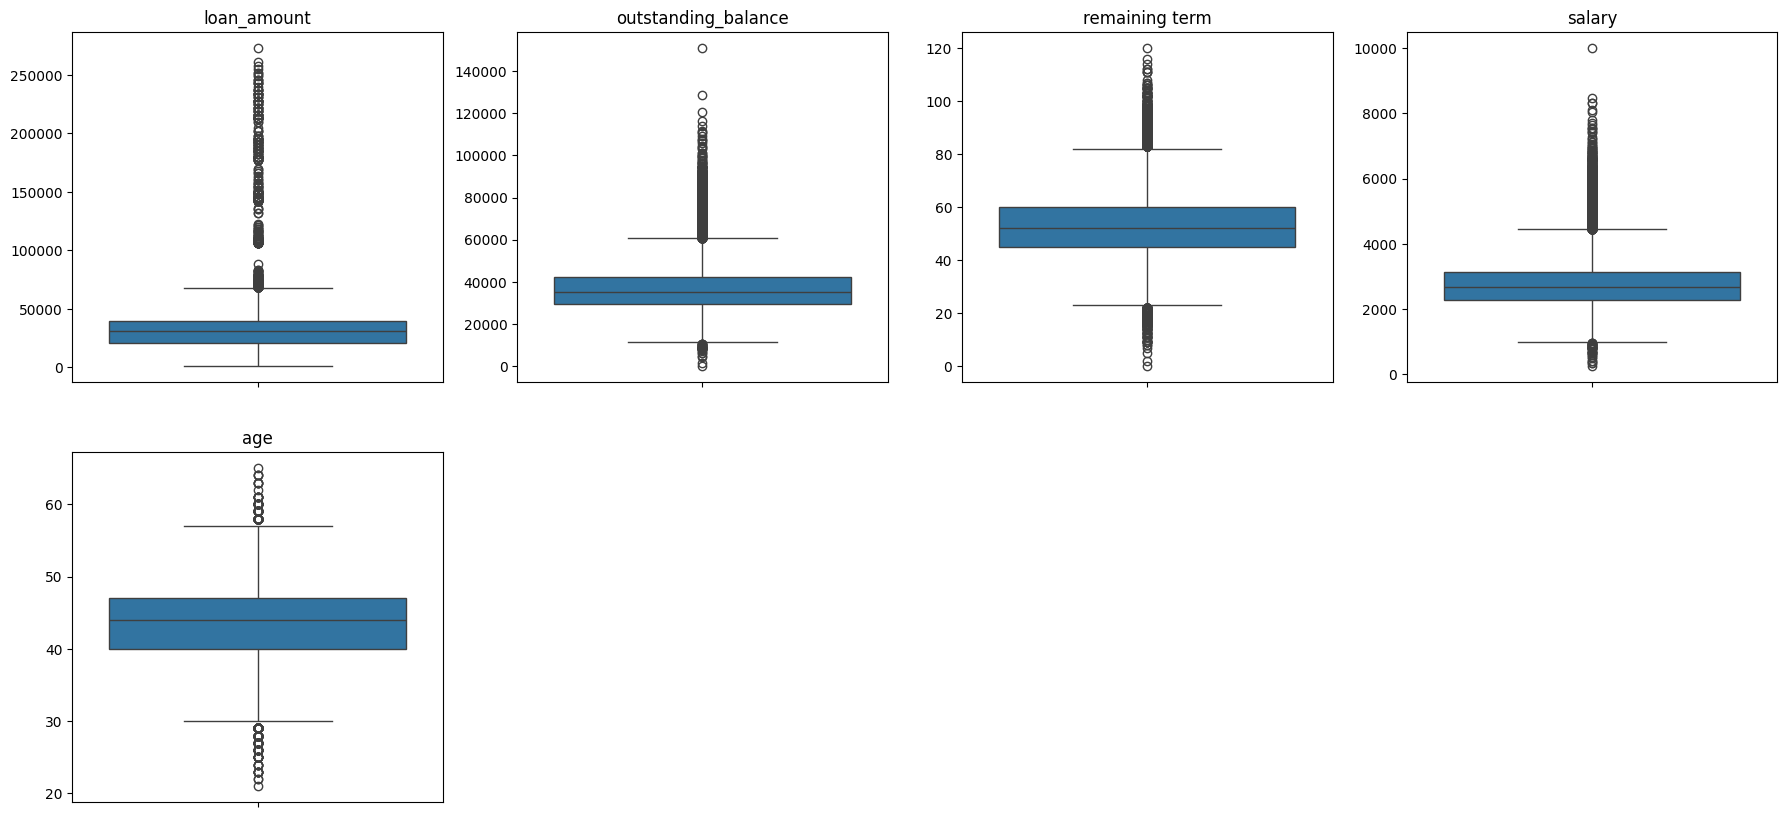

In [56]:
plt.figure(figsize=(22,10))

outlier_col = ['loan_amount','outstanding_balance','remaining term','salary','age']
for i in enumerate(outlier_col):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=data[i[1]])
    plt.title(i[1])
    plt.ylabel("")

<div  class="alert alert-block alert-warning">
    <span style='font-family:Roboto'>
        <b>Insights: </b> It can be seen that the data;
        <ol>
            <li>loan_amount, outstanding_balance, remaining term, salary ,age have outliers.</li>
            <li>age has few outlier values.</li>
        </ol>        
    </span>    
</div>
<p>
    <span style='font-family:Georgia'>
           We can see the summary statistics for these columns below.
    </span>
</p>

In [57]:
data[['loan_amount','outstanding_balance','remaining term','salary','age']].describe()

,loan_amount,outstanding_balance,remaining term,salary,age
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,31120.000000,36964.909763,52.875970,2781.804324,43.57069
std,15895.093631,10014.758477,11.872529,696.450055,4.86376
min,1000.000000,0.000000,0.000000,250.000000,21.00000
25%,21000.000000,29625.227472,45.000000,2273.929349,40.00000
50%,31000.000000,35063.852394,52.000000,2665.441567,44.00000
75%,40000.000000,42133.388817,60.000000,3146.577655,47.00000
max,273000.000000,150960.000000,120.000000,10000.000000,65.00000


<div  class="alert alert-block alert-warning">
    <span style='font-family:Roboto'>
        <b>Insights: </b> It can be seen that the data;
        <ol>
            <li>outstanding_balance:: There is no much differece between the mean and median, signifying that almost all
                    customers had the same outsatnding balance.</li>
            <li>remaining term:: There is no much differece between the mean and median, meaning almost all
                    customers had the same remaining term.</li>
                    <li>age::There is no much differece between the mean age and median age, meaning almost all
                    customers were of the same age.</li>
                    <li>salary:: There is no much differece between the mean salary and median salary, meaning almost all
                    customers had the same salary.</li>
            <li>loan_amount: There is no much difference between the mean loan amount and median loan amount, suggesting that almost all customers borrowed the same amount</li>
        </ol>        
    </span>    
</div>
<p>
   <span style='font-family:Georgia'>
    The choice of handling these outliers::
        <ol>
            <li>Imputation</li>
            <li>Deletion of outliers</li>
            <li>Binning of values</li>
            <li>Cap the outlier</li>
        </ol> 
</span>
   Median was used to impute the outliers since it is a robust measure and is not affected by extreme values and it provides
    a more accurate representation of central tendency of the dataset when outliers are present
</p>

<a id="outlier"></a>
<h2>   
      <font color = purple >
            <span style='font-family:Georgia'>
             Loan Amount
            </span>   
        </font>    
</h2>

In [58]:

# Calculate IQR
Q1 = data['loan_amount'].quantile(0.25)
Q3 = data['loan_amount'].quantile(0.75)
IQR = Q3 - Q1
# Define the lower and upper bounds to identify potential outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Identify potential outliers
outliers = data[(data['loan_amount'] < lower_bound) | (data['loan_amount'] > upper_bound)]
# Display or further analyze the potential outliers
print(outliers)

# Median values :
loan_amount_median= data['loan_amount'].median()

# Imputing the 
data['loan_amount']= data['loan_amount'].apply(lambda x: loan_amount_median if (x < lower_bound or x > upper_bound) else x)

                                    loan_id  gender disbursemet_date  \
362    e2263a14-d5ee-4f3e-82e2-cbf0ffe6fc81       1       2023 03 21   
764    51ad925d-6b6e-4bea-9976-b88a5ec8a232       1       2022 04 24   
1178   d127b36e-7e4d-4baa-a70b-878c6dd5ab26       2       2021 12 28   
1259   e46967d9-3564-4c32-8ade-931a12567f7c       1       2022 09 04   
1319   c2391cbe-e2c8-4327-923d-837d4edc4c56       1       2021 01 31   
...                                     ...     ...              ...   
97222  f314ea2a-ca7b-48e7-9210-36c0f73e95c5       1       2022 07 05   
97498  de414b4b-376c-4733-8c9e-c1f3db5766a6       1       2022 10 27   
99051  261a6748-2783-4721-8a5f-01ed30c531be       1       2022 03 14   
99293  929f537e-0bcc-45b8-8daf-965c5ca62eca       1       2023 02 17   
99880  c2cf8187-158c-43bc-b798-abfcbb70b1d8       0       2023 01 30   

       currency  country  is_employed  job  location  loan_amount  \
362           1        1            1    5        15     135000.0 

<a id="outlier"></a>
<h2>   
      <font color = purple >
            <span style='font-family:Georgia'>
            outstanding_balance
            </span>   
        </font>    
</h2>

In [59]:
# Calculate IQR
Q1 = data['outstanding_balance'].quantile(0.25)
Q3 = data['outstanding_balance'].quantile(0.75)
IQR = Q3 - Q1
# Define the lower and upper bounds to identify potential outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Identify potential outliers
outliers = data[(data['outstanding_balance'] < lower_bound) | (data['outstanding_balance'] > upper_bound)]
# Display or further analyze the potential outliers
print(outliers)


# Median values :
outstanding_balance_median = data['outstanding_balance'].median()

# Imputing the 
data['outstanding_balance']= data['outstanding_balance'].apply(lambda x: outstanding_balance_median if (x < lower_bound or x > upper_bound) else x)

                                    loan_id  gender disbursemet_date  \
9      12fb64f7-8101-4868-a2fe-83178bbaebce       1       2020 12 03   
49     f4fbb3cf-5251-4b75-9a63-08b123298e43       1       2023 07 07   
65     60ee0b23-2b8f-44aa-a652-4743d2160ad3       0       2022 07 12   
167    8e2d0cc5-3ea4-428f-a591-e779a4704478       1       2021 09 16   
222    1cf1bdfb-5288-48f9-9014-4dfd8cc84851       0       2020 12 14   
...                                     ...     ...              ...   
99844  80907579-c92f-48dd-b80f-5a1b066f28e7       1       2020 08 15   
99936  416a4798-4b00-44e8-9a40-a704c2021327       1       2022 10 20   
99953  ba125253-4759-4641-9087-db69d359a338       1       2022 03 23   
99957  3d8456bd-77da-44b5-b0f7-09cdc16f831c       1       2023 06 23   
99998  eded01ca-79d2-4e86-a1e3-2ea1354edca7       1       2021 08 22   

       currency  country  is_employed  job  location  loan_amount  \
9             1        1            1    6        14      50000.0 

<a id="outlier"></a>
<h2>   
      <font color = purple >
            <span style='font-family:Georgia'>
            remaining term
            </span>   
        </font>    
</h2>

In [60]:
# Calculate IQR
Q1 = data['remaining term'].quantile(0.25)
Q3 = data['remaining term'].quantile(0.75)
IQR = Q3 - Q1
# Define the lower and upper bounds to identify potential outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Identify potential outliers
outliers = data[(data['remaining term'] < lower_bound) | (data['remaining term'] > upper_bound)]
# Display or further analyze the potential outliers
print(outliers)



remaining_term_median = data['remaining term'].median()

# Imputing the 
data['remaining term']= data['remaining term'].apply(lambda x: remaining_term_median if (x < lower_bound or x > upper_bound) else x)

                                    loan_id  gender disbursemet_date  \
42     946e6181-bfef-471d-acb3-46880722a126       0       2022 09 27   
117    ea3e6317-feb9-470e-8027-88c3651bdb72       1       2021 02 19   
141    a5fee462-2212-4a26-aebd-a2ac3cc326cc       2       2023 09 27   
188    c8d62265-8e23-447f-b5d9-cec6454eb0bf       1       2023 12 31   
222    1cf1bdfb-5288-48f9-9014-4dfd8cc84851       0       2020 12 14   
...                                     ...     ...              ...   
99596  b3d9f227-a0a8-4249-9e1d-e5e24ace773b       1       2021 08 07   
99706  b103c484-85b7-4a86-9771-c6f7c2af222b       0       2022 03 20   
99846  304ff431-28d0-428b-81d4-94d4994721ea       2       2020 08 08   
99887  a8ee3948-bf0d-46b3-a404-84177cfc75ba       0       2020 04 23   
99891  6abcb577-487b-45cb-b4c8-38378d8d6eb8       1       2021 10 12   

       currency  country  is_employed  job  location  loan_amount  \
42            1        1            1    8         7      42000.0 

<a id="outlier"></a>
<h2>   
      <font color = purple >
            <span style='font-family:Georgia'>
            salary
            </span>   
        </font>    
</h2>

In [61]:
# Calculate IQR
Q1 = data['salary'].quantile(0.25)
Q3 = data['salary'].quantile(0.75)
IQR = Q3 - Q1
# Define the lower and upper bounds to identify potential outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Identify potential outliers
outliers = data[(data['salary'] < lower_bound) | (data['salary'] > upper_bound)]
# Display or further analyze the potential outliers
print(outliers)

salary_median = data['salary'].median()

# Imputing the 
data['salary']= data['salary'].apply(lambda x: salary_median if (x < lower_bound or x > upper_bound) else x)

                                    loan_id  gender disbursemet_date  \
19     e13b63f7-dacd-45d8-8bf7-ee004187cc10       0       2020 04 14   
42     946e6181-bfef-471d-acb3-46880722a126       0       2022 09 27   
117    ea3e6317-feb9-470e-8027-88c3651bdb72       1       2021 02 19   
131    1de56825-5cfc-4ed7-9459-5844ee98302d       0       2023 03 19   
222    1cf1bdfb-5288-48f9-9014-4dfd8cc84851       0       2020 12 14   
...                                     ...     ...              ...   
99769  9a0534f7-eabc-4de7-ab8b-796436b421b4       0       2023 02 23   
99844  80907579-c92f-48dd-b80f-5a1b066f28e7       1       2020 08 15   
99887  a8ee3948-bf0d-46b3-a404-84177cfc75ba       0       2020 04 23   
99936  416a4798-4b00-44e8-9a40-a704c2021327       1       2022 10 20   
99942  46d76b49-5d65-430e-a4d8-a428d931c30e       1       2022 06 21   

       currency  country  is_employed  job  location  loan_amount  \
19            1        1            1    4        11      57000.0 

<a id="outlier"></a>
<h2>   
      <font color = purple >
            <span style='font-family:Georgia'>
           age
            </span>   
        </font>    
</h2>

In [62]:
# Calculate IQR
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1
# Define the lower and upper bounds to identify potential outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Identify potential outliers
outliers = data[(data['age'] < lower_bound) | (data['age'] > upper_bound)]
# Display or further analyze the potential outliers
print(outliers)

age_median = data['age'].median()

# Imputing the 
data['age']= data['age'].apply(lambda x: age_median if (x < lower_bound or x > upper_bound) else x)

                                    loan_id  gender disbursemet_date  \
88     7bb453d1-e38a-40be-960d-54f6f93372a1       0       2021 07 08   
196    59b9a81e-c0db-446d-a200-519807d5d0fb       0       2022 01 28   
381    9e7260ff-0c82-4740-b37b-08a5d8ee2e26       1       2020 03 26   
440    7908dc9c-696a-4694-92c4-e408bad05677       1       2021 11 20   
612    6066356f-08d6-43f9-9ec8-d31c36b77078       0       2020 08 08   
...                                     ...     ...              ...   
99128  bddbf023-d13b-4faf-82ef-d1796c135fbf       2       2020 07 04   
99571  e5c47975-f5a2-4f09-811d-90bdba71fc49       0       2022 05 28   
99743  c07c8181-0fda-4ce8-9236-fb8036526a6f       2       2021 02 26   
99785  da02ff70-5f10-413d-8e1c-cf471c5f800e       0       2020 11 11   
99936  416a4798-4b00-44e8-9a40-a704c2021327       1       2022 10 20   

       currency  country  is_employed  job  location  loan_amount  \
88            1        1            1    6        15      32000.0 

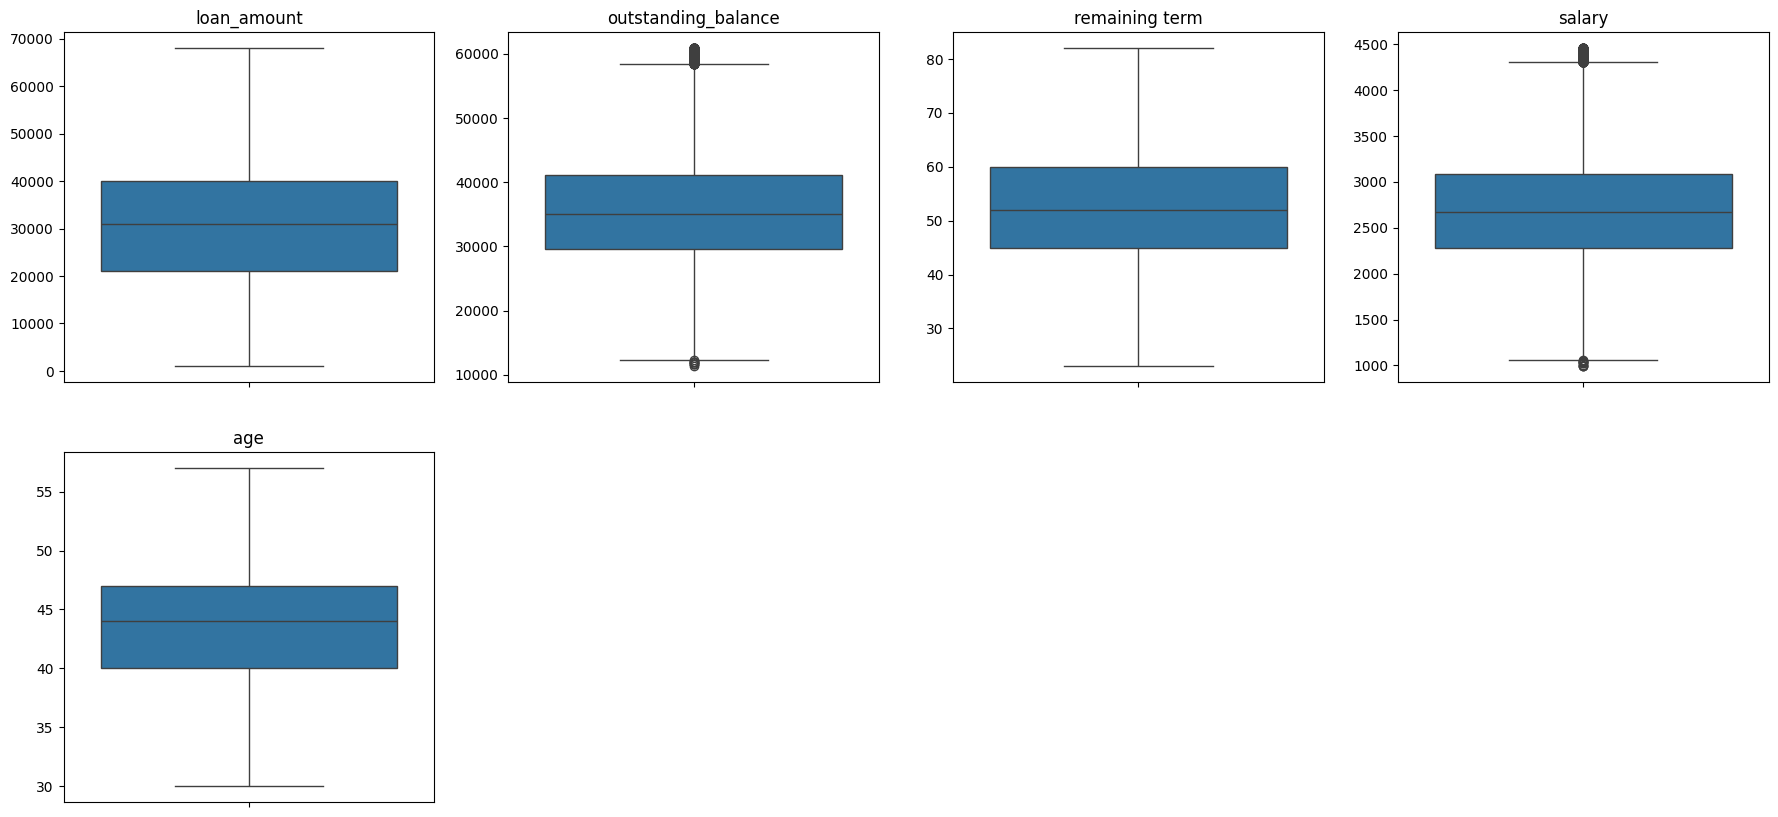

In [63]:
plt.figure(figsize=(22,10))

outlier_col = ['loan_amount','outstanding_balance','remaining term','salary','age']
for i in enumerate(outlier_col):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=data[i[1]])
    plt.title(i[1])
    plt.ylabel("")

<a id="outlier"></a>
<h2>   
      <font color = purple >
            <span style='font-family:Georgia'>
           checking for correlation between continous variables
            </span>   
        </font>    
</h2>

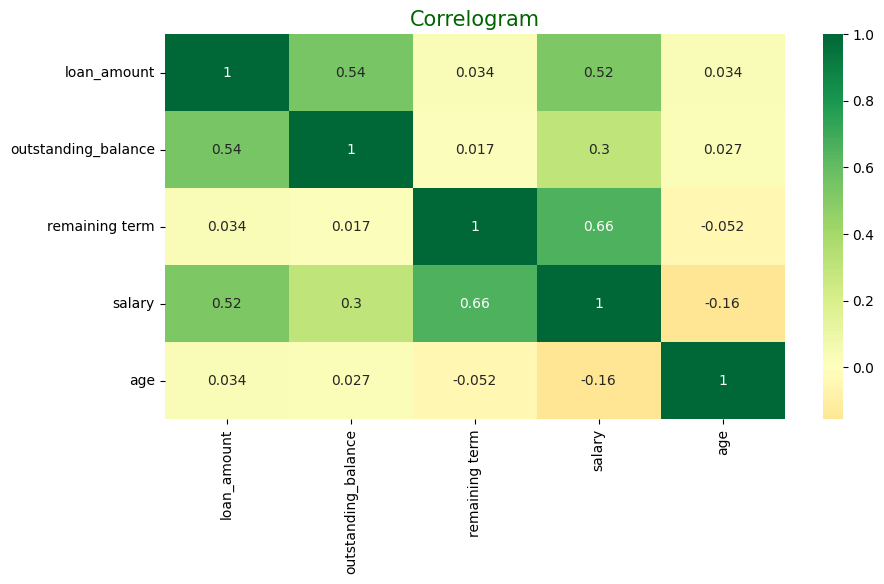

In [64]:
# Plotting a heatmap to show correlations between variables
corr_df = data[['loan_amount','outstanding_balance','remaining term','salary','age']]
corr = corr_df.corr()
plt.figure(figsize = (10, 5))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

<div  class="alert alert-block alert-warning">
    <span style='font-family:Roboto'>
    <b>Insights: </b> It can be seen that;
<p>
   The continous explanatory features are not highly correlated indicating the absence of multicollinearity.
</p>

<div style="border-radius: 10px; background-color: blue">
    <h4 style="color: white; padding: 1rem">Analysing Categorical Variables against TARGET</h4>
</div> 

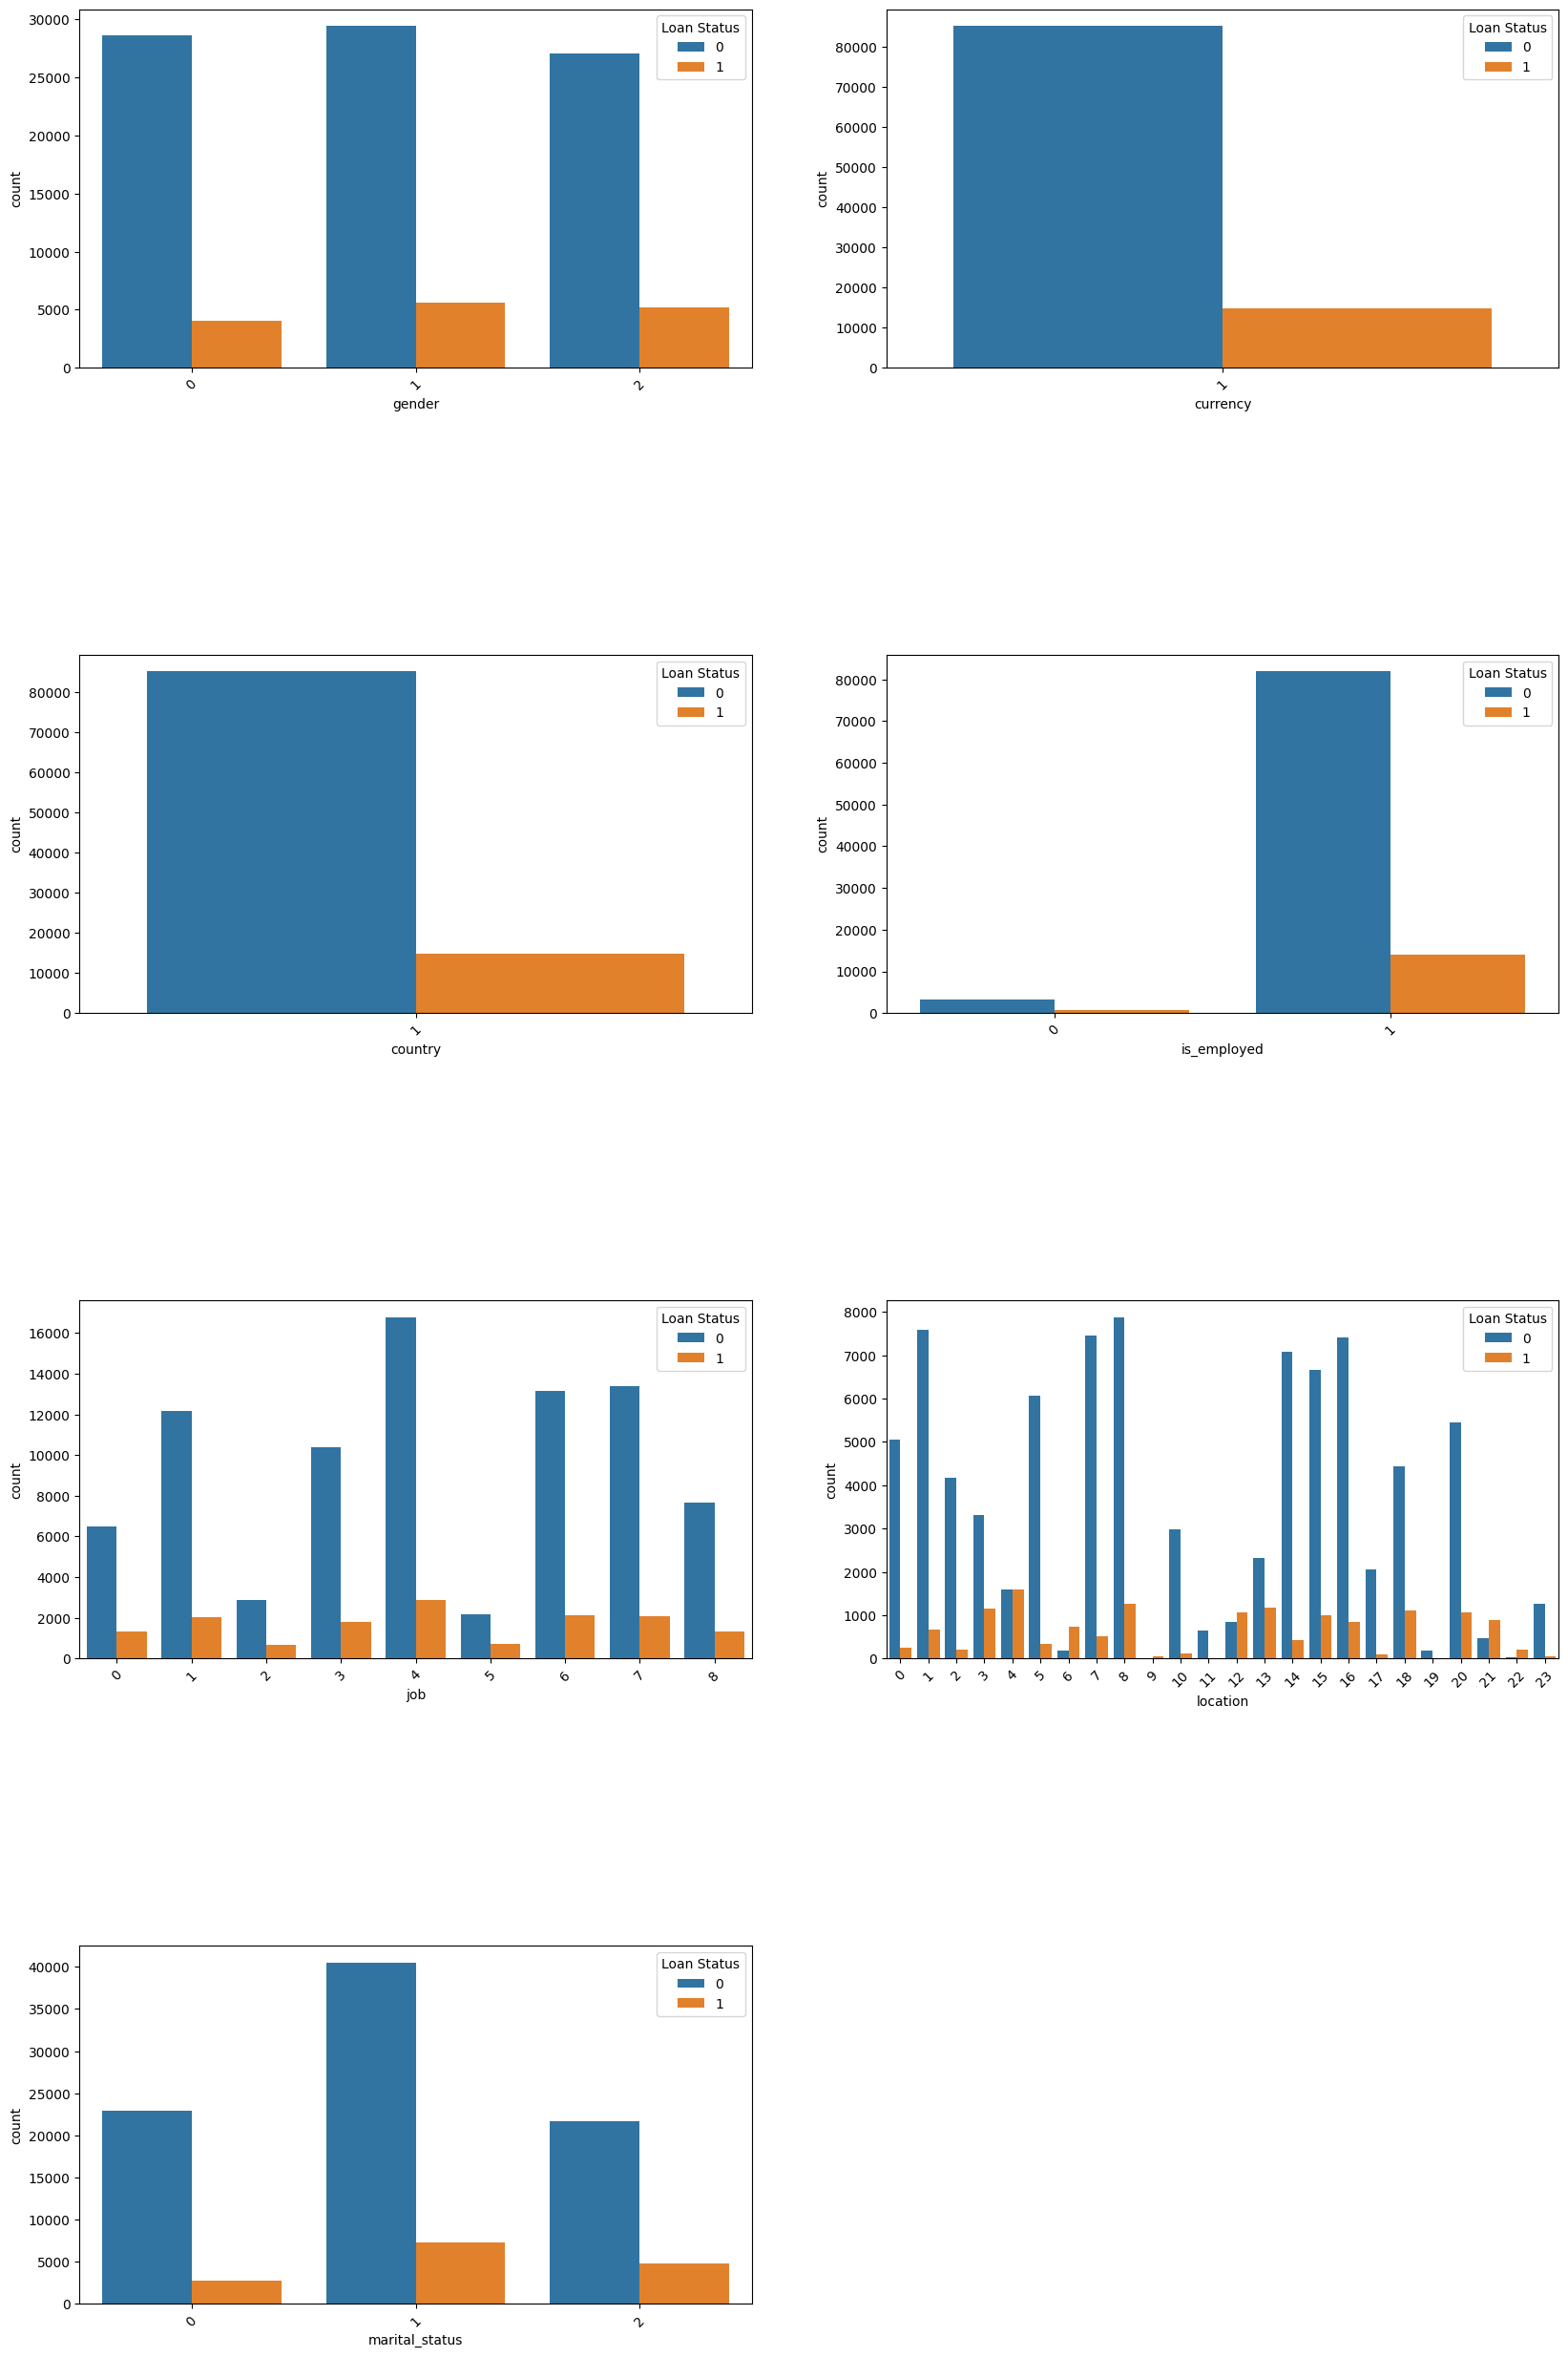

In [65]:
features = ['gender', 'currency','country','is_employed', 'job','location','marital_status']
plt.figure(figsize = (20, 40))

plt.subplots_adjust(hspace=0.8)
for i in enumerate(features):
    plt.subplot(5, 2, i[0]+1)
    sns.countplot(x = i[1], hue = 'Loan Status', data = data)
    plt.xticks(rotation = 45)
    

#### Insights

<li> Marital Status ( 0-> Single, 1->Married, 2->Divorced)</li>
    <p>Among the 3 categories the group of married individuals had large number of defaulting cases followed by divorced individuals than sindle people</p>
    
<li>is_employed (1-> True, 0->False)</li>
<p>Between the two groups people who are employed defaulted loan payments more than those not employed</p>

<li>Gender (0-> female, 1->Male, 2->Other)</li>
<p>Number of borrowings between the 3 categories of gender was relatively the same throughout, though male and other individuals had a quite more defaults than females.</p>


<li>Location ('Beitbridge': 0, 'Harare': 8, 'Gweru': 7, 'Rusape': 20, 'Chipinge': 3, 'Chimanimani': 2, 'Marondera': 14, 'Kadoma': 10, 'Mutare': 16, 'Masvingo': 15, 'Bulawayo': 1, 'Kariba': 11, 'Plumtree': 18, 'Chiredzi': 4, 'Shurugwi': 21, 'Chivhu': 5, 'Zvishavane': 23, 'Nyanga': 17, 'Karoi': 12, 'Redcliff': 19, 'Kwekwe': 13, 'Gokwe': 6, 'Victoria falls': 22, 'Hwange': 9)</li>
<p>Individuals from Chiredzi defaulted more than any other individuals from other cities, followed by chipinge and harare, kwekwe and then Plumtree and Masvingo</p>

<li> Job (Teacher ->8, Nurse->6, Doctor->3, Data Anlyst->1,Sofware developer->7, Accountant->0, Engineer->4, Lawyer->5,Data Scientist->2)</li>

<p>Engineers defaulted more than other professions, followed by Nurses, Software developers, Data Analysts and Doctors</p>


  

<div style="border-radius: 10px; background-color: blue">
    <h4 style="color: white; padding: 1rem">TARGET Variable</h4>
</div> 

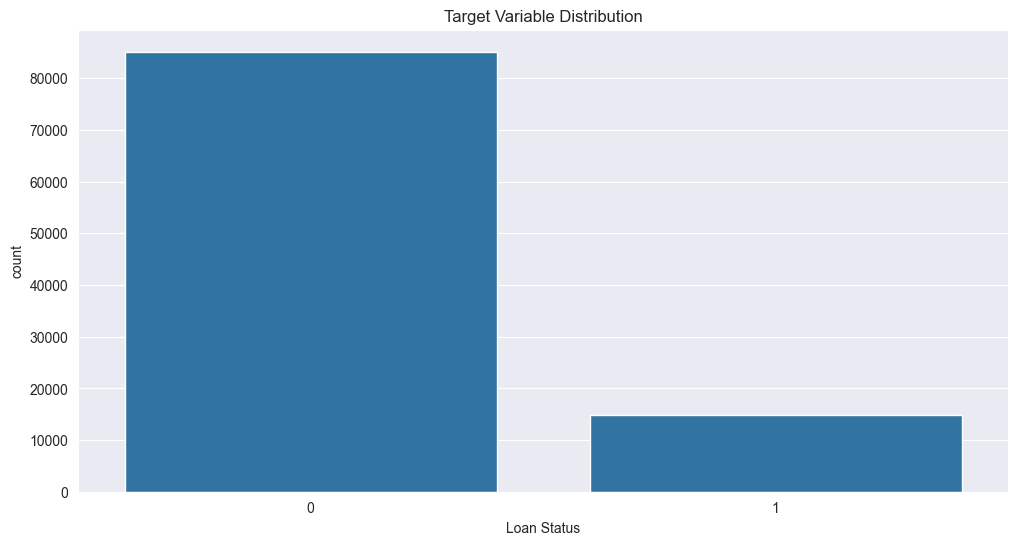

In [66]:
# DISTRIBUTION OF TARGET VARIABLE CLASSES
sns.set_style('darkgrid')
plt.figure(figsize=(12, 6))
sns.countplot(x = 'Loan Status', data = data)
plt.title('Target Variable Distribution')
plt.show()

<div  class="alert alert alert-warning">
    <span style='font-family:Roboto'>
    <b>Insights: </b> It can be seen that;
<p>
   The data is skewed(Imbalanced), the number of non-defaulters (negetive class) has many observations as compared to defaulters (positive class).
    The problem at hand is imbalanced classification.. Imbalanced datasets
(skewed datasets) have a large difference in the number of events (positive class observations) versus non-events (negative class observations) in binary response classes. Therefore the problem  at hand is how to imrpove the detection and classification performance of machine learning modles for the minority class(1->defaults), while maintaining fairness in classfying the majority(class0->non-defaults)

</p>

In [67]:
##LETS RENAME THE TARGET COLUMNS
data.rename(columns = {'Loan Status': 'Loan_Status'},inplace = True)

In [68]:
from collections import Counter
print(Counter(data.Loan_Status))

Counter({0: 85134, 1: 14866})


In [69]:
### LETS CALCULATE THE IMBALANCED RATIO TO SEE THE DEGREE OF IMBALANCE
## IR =(NUMBER OF MAJORTY CLASS INSTANCES)/(NUMBER OF MINORITY CLASS INSTANCES)
IR = 85134/14866
print(IR)

5.726759047490919


<div  class="alert alert alert-warning">
    <span style='font-family:Roboto'>
    <b>Insights: </b> It can be seen that;
<p>
   The defaulters class consists of 14.9% of the whole data. The Imbalance Ratio is 5.73 (2dp) and the dataset can be classified
    as moderate imbalance since the proportion of the minority class (defaulters) is between 1-20% of the dataset 

</p>

#### Scalling the data

Standard Scaler is used for feature scaling
<p>Justification::</p>
        <p>1. It is Non-parametric, that is does not assume any specific distribution for the data</p>
        <p>2. Highly scalable: can handle high-dimensional data and is suitable for large datasets</p>

In [70]:
encoded_df = data.drop(['loan_id','disbursemet_date','Loan_Status'],axis = 1)
df_target= data[['Loan_Status']]

In [71]:
random.seed(SEED)
X_train, X_test, y_train, y_test = train_test_split(encoded_df, df_target, test_size=0.3, random_state=12)

In [72]:
sc = StandardScaler().set_output(transform="pandas")
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

#### Feature selection

<div  class="alert alert alert-warning">
    <span style='font-family:Roboto'>
    <b> LASSO is used for feature selection </b> 
        <p>justification:::;</p>
<ol>
    <li>Automatic Feature Selection:
        By setting some coefficients to zero, Lasso inherently performs feature selection. This allows for the automatic 
 identification of the most significant features without the need for additional steps.
    </li>
    <li>Handling Multicollinearity: In cases where features are correlated, Lasso helps by selecting one feature from a group of correlated features, thus improving model interpretability and stability.</li>
    <li>Simplicity and Interpretability: The resulting model is easier to interpret because it focuses on a smaller subset of features. This is particularly beneficial for understanding the underlying relationships in the data.</li>
    <li>Scalability: Lasso is computationally efficient, making it suitable for large datasets with many features, ensuring effective feature selection in high-dimensional spaces</li>
        </ol>


In [73]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import Lasso, ElasticNet, ElasticNetCV
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split,RepeatedKFold

In [74]:
# choosing best parameters
random.seed(123)
params = {"alpha":np.arange(0.00001, 10, 100)}
kf=KFold(n_splits=100,shuffle=True, random_state=42)
## initializze the lasso model for feature selection
lasso = Lasso()
lasso_cv=GridSearchCV(lasso, param_grid=params, cv=kf)
lasso_cv.fit(encoded_df, df_target)
print("Best Params {}".format(lasso_cv.best_params_))

Best Params {'alpha': 1e-05}


Column Names: ['gender' 'currency' 'country' 'is_employed' 'job' 'location'
 'loan_amount' 'number_of_defaults' 'outstanding_balance' 'interest_rate'
 'age' 'remaining term' 'salary' 'marital_status']


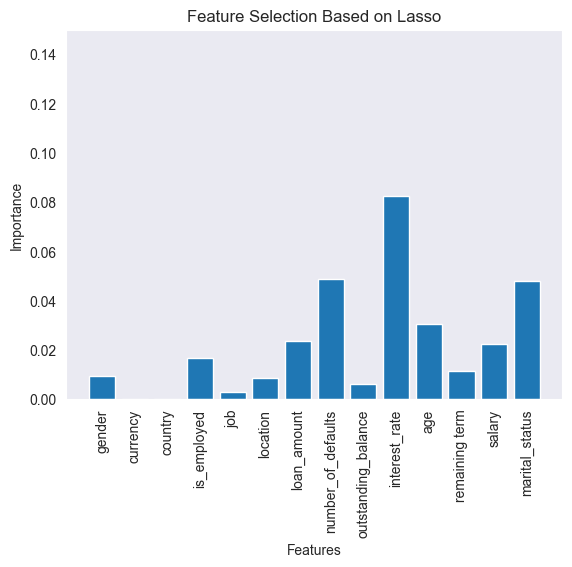

In [75]:
names=X_train_sc.columns
print("Column Names: {}".format(names.values))
alpha = lasso_cv.best_params_['alpha']
# calling the model with the best parameter
lasso1 = Lasso(alpha=alpha)
lasso1.fit(X_train_sc, y_train)
# Using np.abs() to make coefficients positive.
lasso1_coef = np.abs(lasso1.coef_)

# plotting the Column Names and Importance of Columns.
plt.bar(names, lasso1_coef)
plt.xticks(rotation=90)
plt.grid()
plt.title("Feature Selection Based on Lasso")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.ylim(0, 0.15)
plt.show()

In [76]:
coef = pd.Series(lasso1.coef_, index=X_train_sc.columns)
print("LASSO Picked " + str(sum(coef !=0)) + "Variables and eliminated the other " + str(sum(coef==0)) + "variables" )

LASSO Picked 12Variables and eliminated the other 2variables


In [77]:
feature_subset=np.array(names)[lasso1_coef>0]
print("Selected Feature Columns: {}".format(feature_subset))
X_train_sc = X_train_sc[feature_subset]
X_test_sc = X_test_sc[feature_subset]

Selected Feature Columns: ['gender' 'is_employed' 'job' 'location' 'loan_amount'
 'number_of_defaults' 'outstanding_balance' 'interest_rate' 'age'
 'remaining term' 'salary' 'marital_status']


In [78]:
print("Shape of Train Featues: {}".format(X_train_sc.shape))
print("Shape of Test Featues: {}".format(X_test_sc.shape))
print("Shape of Train Target: {}".format(y_train.shape))
print("Shape of Test Target: {}".format(y_test.shape))

Shape of Train Featues: (70000, 12)
Shape of Test Featues: (30000, 12)
Shape of Train Target: (70000, 1)
Shape of Test Target: (30000, 1)


In [79]:
from scipy import stats
from sklearn.metrics import roc_curve, auc, precision_recall_curve, f1_score, roc_auc_score, make_scorer
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split,RepeatedKFold
from collections import Counter

In [80]:
from sklearn.preprocessing import StandardScaler
import random
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score,accuracy_score,f1_score, cohen_kappa_score
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, KFold
from imblearn.combine import SMOTEENN

In [81]:
X_train_sc

,gender,is_employed,job,location,loan_amount,number_of_defaults,outstanding_balance,interest_rate,age,remaining term,salary,marital_status
28755,-1.235754,0.207443,-0.492905,1.521416,1.123942,-0.644163,-1.279835,-0.025867,-0.128095,-1.050301,-0.583877,1.377444
4968,-1.235754,0.207443,1.113621,1.521416,0.029860,2.256631,-0.116552,1.577945,0.294341,-0.506505,1.028224,1.377444
61094,-1.235754,0.207443,-0.492905,-1.532182,0.102799,-0.644163,-0.941960,-0.025867,-0.972967,-0.234607,0.010222,1.377444
26728,0.004963,0.207443,1.515252,0.910696,-0.918344,-0.644163,-0.828623,-1.629680,0.716778,-0.959668,-0.950187,-0.008693
88457,-1.235754,0.207443,-0.492905,-1.226822,0.394554,-0.644163,0.607187,-0.025867,-0.550531,-0.959668,-0.495385,1.377444
...,...,...,...,...,...,...,...,...,...,...,...,...
75011,-1.235754,0.207443,-1.296168,0.605337,-0.261895,-0.644163,-0.851593,-1.629680,-0.761749,0.309190,0.434777,-1.394830
36482,-1.235754,0.207443,-1.296168,-0.463423,0.394554,-0.644163,-0.027752,-0.560471,0.294341,-2.591057,-1.997213,-1.394830
40177,0.004963,0.207443,-1.697800,1.216056,-1.355977,-0.644163,-0.810544,0.508737,-1.606621,0.218557,-0.675658,1.377444
19709,-1.235754,-4.820604,-1.296168,0.147297,0.905126,-0.644163,0.963820,-0.025867,0.927996,1.124884,1.028314,-1.394830


## Data balancing techniques

To balance the two classes in the data 3 methods were compared
1. SMOTENC >>> For handling both Nominal and Continous features
2. SMOTEENN >>> This technique is used because it contributes to comprehensive
data cleaning. Here, further examples from both classes are removed to ensure noise reduction caused by SMOTE.
3. ADASYN >>> It adaptively modifies the sampling density based on the difficulty
of learning regions and producing synthetic samples in places where the minority class
is underrepresented, therefore making it better than SMOTE

In [82]:
## LETS APPLY SMOTE_ENC TO OUR DATA
samp_pipeline = SMOTENC(categorical_features = [0,1,3,11,])
X_S_ENC, y_S_ENC = samp_pipeline.fit_resample(X_train_sc, y_train)

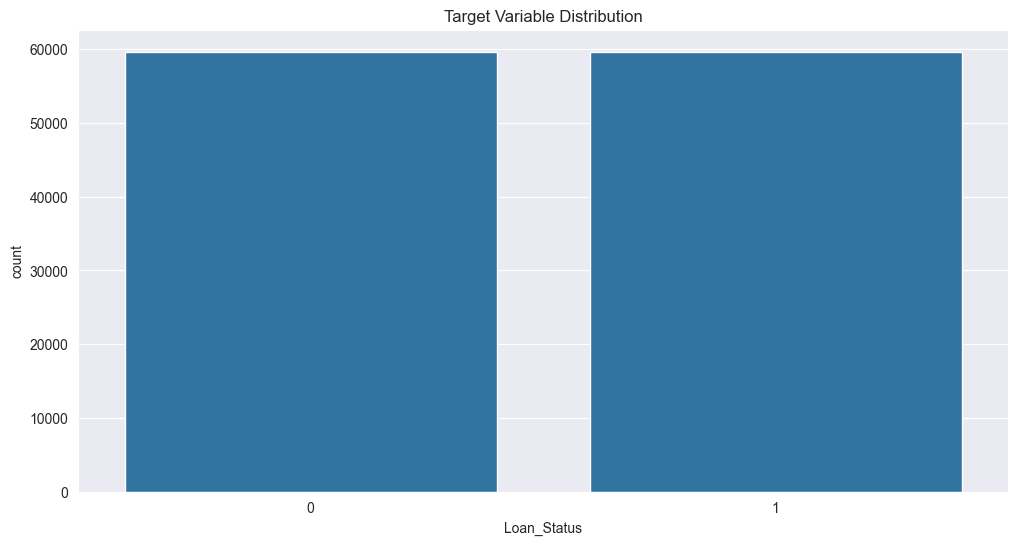

In [83]:
# DISTRIBUTION OF TARGET VARIABLE CLASSES
sns.set_style('darkgrid')
plt.figure(figsize=(12, 6))
sns.countplot(x = 'Loan_Status', data = y_S_ENC)
plt.title('Target Variable Distribution')
plt.show()

In [84]:
#### lets apply smote-enn
samp_pipeline = SMOTEENN(random_state=42)
X_S_ENN, y_S_ENN = samp_pipeline.fit_resample(X_train_sc, y_train)

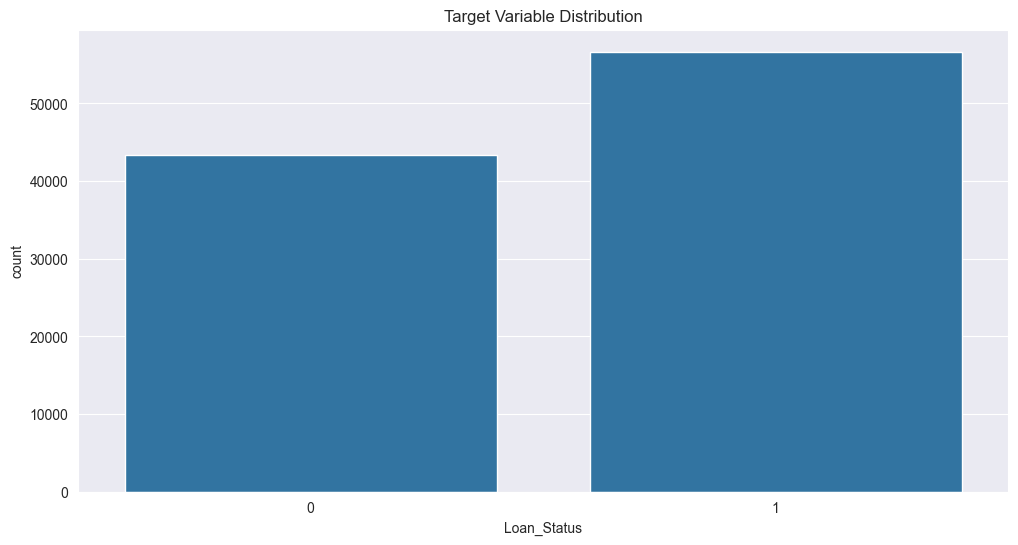

In [85]:
# DISTRIBUTION OF TARGET VARIABLE CLASSES
sns.set_style('darkgrid')
plt.figure(figsize=(12, 6))
sns.countplot(x = 'Loan_Status', data = y_S_ENN)
plt.title('Target Variable Distribution')
plt.show()

In [86]:
####lets apply adasyn

from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=42)
X_res, y_res = ada.fit_resample(X_train_sc, y_train)

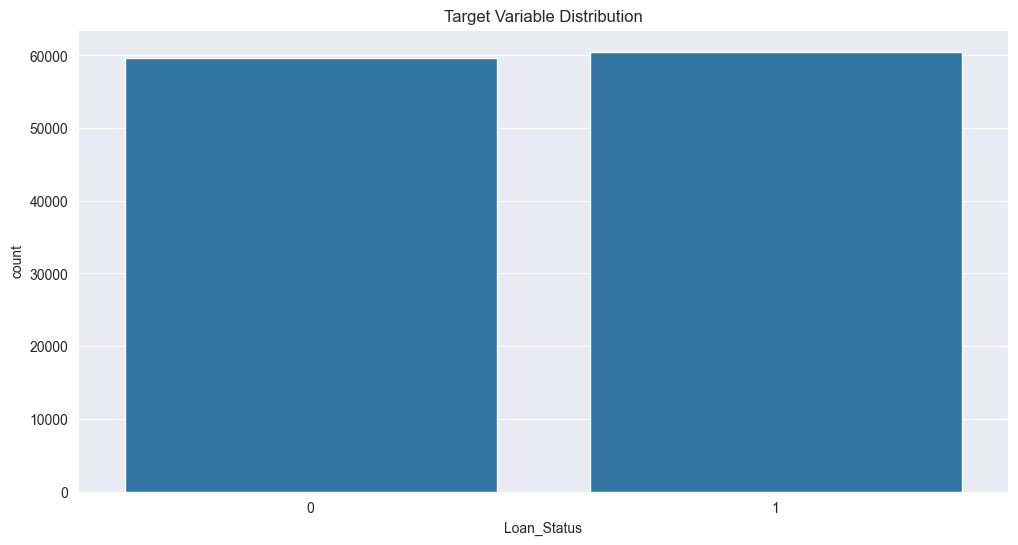

In [87]:
# DISTRIBUTION OF TARGET VARIABLE CLASSES
sns.set_style('darkgrid')
plt.figure(figsize=(12, 6))
sns.countplot(x = 'Loan_Status', data = y_res)
plt.title('Target Variable Distribution')
plt.show()

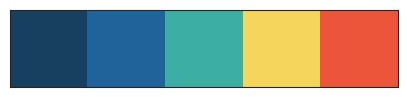

In [88]:
####### lets check for consistency of the methods
from tqdm import tqdm

# Modelling
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn import metrics


sns.set_style("white")

### Define the colour scheme
c1 = "#173f5f"
c2 = "#20639b"
c3 = "#3caea3"
c4 = "#f6d55c"
c5 = "#ed553b"

custom_palette = [c1, c2, c3, c4, c5]
sns.palplot(sns.color_palette(custom_palette))

In [89]:
####smote-nc

for sample_frac in tqdm(np.arange(20, 105, 5)):
    
    sampling_strategy = sample_frac/100
    train_data = RandomForestClassifier()
    clf = train_data.fit(X_S_ENC, y_S_ENC)
    
    # Make predictions
    y_pred = clf.predict(X_test_sc)
    y_pred_bin = (y_pred > 0.5).astype("int")

    # Calculate ROC AUC score
    roc_auc = metrics.roc_auc_score(y_test, y_pred)
    f1_score = metrics.f1_score(y_test, y_pred_bin)
    precision_score = metrics.precision_score(y_test, y_pred_bin)
    recall_score = metrics.recall_score(y_test, y_pred_bin)

    if sample_frac == 20:
        df_result_nc = pd.DataFrame({'frac': [sampling_strategy], 'roc': [roc_auc], 'f1': [f1_score], 'precision': [precision_score], 'recall': [recall_score]})
    else:
        df_tmp = pd.DataFrame({'frac': [sampling_strategy], 'roc': [roc_auc], 'f1': [f1_score], 'precision': [precision_score], 'recall': [recall_score]})
        df_result_nc = pd.concat([df_result_nc, df_tmp], ignore_index=True, axis=0)
        
df_result_nc.head()  

100%|██████████| 17/17 [09:44<00:00, 34.38s/it]


,frac,roc,f1,precision,recall
0,0.20,0.775956,0.664233,0.772927,0.582340
1,0.25,0.773268,0.662430,0.780707,0.575276
2,0.30,0.772495,0.661239,0.780246,0.573731
3,0.35,0.774183,0.663621,0.780364,0.577263
4,0.40,0.772576,0.660076,0.775000,0.574834


In [90]:
####smote-enn

for sample_frac in tqdm(np.arange(20, 105, 5)):
    
    sampling_strategy = sample_frac/100
    train_data = RandomForestClassifier()
    clf = train_data.fit(X_S_ENN, y_S_ENN)
    
    # Make predictions
    y_pred = clf.predict(X_test_sc)
    y_pred_bin = (y_pred > 0.5).astype("int")

    # Calculate ROC AUC score
    roc_auc = metrics.roc_auc_score(y_test, y_pred)
    f1_score = metrics.f1_score(y_test, y_pred_bin)
    precision_score = metrics.precision_score(y_test, y_pred_bin)
    recall_score = metrics.recall_score(y_test, y_pred_bin)

    if sample_frac == 20:
        df_result_enn = pd.DataFrame({'frac': [sampling_strategy], 'roc': [roc_auc], 'f1': [f1_score], 'precision': [precision_score], 'recall': [recall_score]})
    else:
        df_tmp = pd.DataFrame({'frac': [sampling_strategy], 'roc': [roc_auc], 'f1': [f1_score], 'precision': [precision_score], 'recall': [recall_score]})
        df_result_enn = pd.concat([df_result_enn, df_tmp], ignore_index=True, axis=0)
        
df_result_enn.head() 

100%|██████████| 17/17 [07:39<00:00, 27.04s/it]


,frac,roc,f1,precision,recall
0,0.20,0.792976,0.645854,0.641009,0.650773
1,0.25,0.790964,0.643587,0.640840,0.646358
2,0.30,0.789993,0.643070,0.642432,0.643709
3,0.35,0.789552,0.642471,0.642117,0.642826
4,0.40,0.787702,0.640265,0.641685,0.638852


In [91]:
####adasyn

for sample_frac in tqdm(np.arange(20, 105, 5)):
    
    sampling_strategy = sample_frac/100
    train_data = RandomForestClassifier()
    clf = train_data.fit(X_res, y_res)
    
    # Make predictions
    y_pred = clf.predict(X_test_sc)
    y_pred_bin = (y_pred > 0.5).astype("int")

    # Calculate ROC AUC score
    roc_auc = metrics.roc_auc_score(y_test, y_pred)
    f1_score = metrics.f1_score(y_test, y_pred_bin)
    precision_score = metrics.precision_score(y_test, y_pred_bin)
    recall_score = metrics.recall_score(y_test, y_pred_bin)

    if sample_frac == 20:
        df_result_ada = pd.DataFrame({'frac': [sampling_strategy], 'roc': [roc_auc], 'f1': [f1_score], 'precision': [precision_score], 'recall': [recall_score]})
    else:
        df_tmp = pd.DataFrame({'frac': [sampling_strategy], 'roc': [roc_auc], 'f1': [f1_score], 'precision': [precision_score], 'recall': [recall_score]})
        df_result_ada = pd.concat([df_result_ada, df_tmp], ignore_index=True, axis=0)
        
df_result_ada.head() 

100%|██████████| 17/17 [09:32<00:00, 33.67s/it]


,frac,roc,f1,precision,recall
0,0.20,0.765999,0.656600,0.800127,0.556733
1,0.25,0.763021,0.650364,0.791640,0.551876
2,0.30,0.764498,0.653731,0.797078,0.554084
3,0.35,0.766509,0.658830,0.806782,0.556733
4,0.40,0.763917,0.653942,0.801860,0.552097


In [92]:
df_result_nc_rename = df_result_nc.copy()
df_result_enn_rename = df_result_enn.copy()
df_result_nc_rename = df_result_nc_rename.rename(columns={'roc':'roc_nc', 'f1':'f1_nc', 'precision':'precision_nc', 'recall':'recall_nc'})
df_result_enn_rename = df_result_enn_rename.rename(columns={'roc':'roc_enn', 'f1':'f1_enn', 'precision':'precision_enn', 'recall':'recall_enn'})

In [93]:
df_result = df_result_ada.merge(df_result_nc_rename, on='frac', how='left')
df_result = df_result.merge(df_result_enn_rename, on='frac', how='left')

df_result.head()

,frac,roc,f1,precision,recall,roc_nc,f1_nc,precision_nc,recall_nc,roc_enn,f1_enn,precision_enn,recall_enn
0,0.20,0.765999,0.656600,0.800127,0.556733,0.775956,0.664233,0.772927,0.582340,0.792976,0.645854,0.641009,0.650773
1,0.25,0.763021,0.650364,0.791640,0.551876,0.773268,0.662430,0.780707,0.575276,0.790964,0.643587,0.640840,0.646358
2,0.30,0.764498,0.653731,0.797078,0.554084,0.772495,0.661239,0.780246,0.573731,0.789993,0.643070,0.642432,0.643709
3,0.35,0.766509,0.658830,0.806782,0.556733,0.774183,0.663621,0.780364,0.577263,0.789552,0.642471,0.642117,0.642826
4,0.40,0.763917,0.653942,0.801860,0.552097,0.772576,0.660076,0.775000,0.574834,0.787702,0.640265,0.641685,0.638852


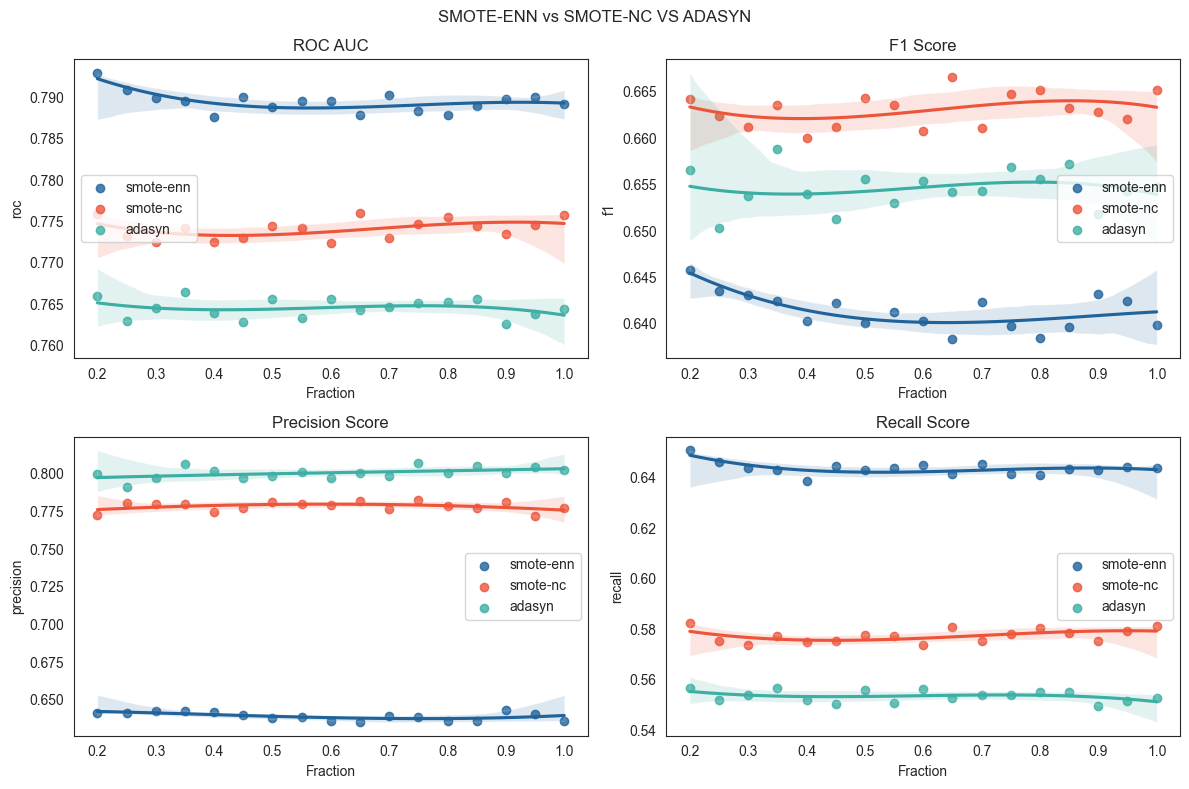

In [112]:
fig, ax = plt.subplots(figsize=(12,8), ncols=2, nrows=2)
fig.suptitle('SMOTE-ENN vs SMOTE-NC VS ADASYN')

# AUC
sns.regplot(x = "frac", y = "roc_enn", data = df_result, color=c2, order=3, ax=ax[0,0], label='smote-enn')
sns.regplot(x = "frac", y = "roc_nc", data = df_result, color=c5, order=3, ax=ax[0,0], label='smote-nc')
sns.regplot(x = "frac", y = "roc", data = df_result, color=c3, order=3, ax=ax[0,0], label='adasyn')
ax[0,0].set(title='ROC AUC', xlabel='Fraction')
ax[0,0].legend()

# F1
sns.regplot(x = "frac", y = "f1_enn", data = df_result, color=c2, order=3, ax=ax[0,1], label='smote-enn')
sns.regplot(x = "frac", y = "f1_nc", data = df_result, color=c5, order=3, ax=ax[0,1], label='smote-nc')
sns.regplot(x = "frac", y = "f1", data = df_result, color=c3, order=3, ax=ax[0,1], label='adasyn')
ax[0,1].set(title='F1 Score', xlabel='Fraction')
ax[0,1].legend()

# Precision
sns.regplot(x = "frac", y = "precision_enn", data = df_result, color=c2, order=3, ax=ax[1,0], label='smote-enn')
sns.regplot(x = "frac", y = "precision_nc", data = df_result, color=c5, order=3, ax=ax[1,0], label='smote-nc')
sns.regplot(x = "frac", y = "precision", data = df_result, color=c3, order=3, ax=ax[1,0], label='adasyn')
ax[1,0].set(title='Precision Score', xlabel='Fraction')
ax[1,0].legend()

# Recall
sns.regplot(x = "frac", y = "recall_enn", data = df_result, color=c2, order=3, ax=ax[1,1], label='smote-enn')
sns.regplot(x = "frac", y = "recall_nc", data = df_result, color=c5, order=3, ax=ax[1,1], label='smote-nc')
sns.regplot(x = "frac", y = "recall", data = df_result, color=c3, order=3, ax=ax[1,1], label='adasyn')
ax[1,1].set(title='Recall Score', xlabel='Fraction')
ax[1,1].legend()

plt.tight_layout()
plt.show()

Hyperparametrs to Tune:
<ol>
    <li>n_estimators: Number of trees in the forest: Rationale: More trees usually lead to better performance but increase computation time.</li>
<li>max_depth: Maximum depth of the trees: Rationale: Limits overfitting by controlling tree complexity.</li>
<li>min_samples_split: Minimum number of samples required to split an internal node: Rationale: Helps prevent overfitting by ensuring nodes have sufficient samples.</li>
    <li>min_samples_leaf: The minimum number of samples required to be at a leaf node: Reduce variance of the model, making it more robust to noise and outliers and as well as to prevent overfitting</li>
    <li>bootstrap: Increase diversity among the decision trees in the ensemble, leading to a more robust and accurate model</li>
    <li>max_leaf_nodes: It prevents overfitting by limiting the number of leaf nodes</li>



In [94]:
RF = RandomForestClassifier(random_state=42)
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [None, 10, 20],
    'n_estimators': [100, 200, 300],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,5,10],
    'max_leaf_nodes' : [20, 30]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator =RF, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, scoring='roc_auc')
# Fit the grid search to the data
grid_search.fit(X_S_ENN, y_S_ENN)
grid_search.best_params_

Fitting 3 folds for each of 162 candidates, totalling 486 fits


{'bootstrap': True,
 'max_depth': None,
 'max_leaf_nodes': 30,
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'n_estimators': 300}

#### KNN

<li>n_neighbors: Number of neighbors to consider for classification or regression: Rationale: Affects model bias and variance; too few neighbors can lead to overfitting, while too many can smooth out important patterns.</li>
<li>weights: Function used in prediction ('uniform' or 'distance'): Rationale: Choosing 'distance' can give more importance to closer neighbors, improving prediction quality.</li>
<li> Metric


In [95]:
KNN= KNeighborsClassifier()
# Create the parameter grid based on the results of random search 
grid_params = { 'n_neighbors' : [3,5,7,9,11],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
# Instantiate the grid search model
grid_search = GridSearchCV(estimator =KNN, param_grid = grid_params, 
                          cv = 3, n_jobs = -1, verbose = 2, scoring='roc_auc')
# Fit the grid search to the data
grid_search.fit(X_S_ENN, y_S_ENN)
grid_search.best_params_

Fitting 3 folds for each of 30 candidates, totalling 90 fits

{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}

#### DECISION TREE

Hyperparameters to Tune:
<li>max_depth:
    Rationale: Similar to Random Forest, this parameter limits the depth of the tree, which helps prevent overfitting by controlling model complexity.</li>
<li>min_samples_split: Rationale: Specifies the minimum number of samples required to split a node. A higher value can lead to a more generalized model and reduce the chance of capturing noise.</li>
<li>min_samples_leaf: Rationale: Sets the minimum number of samples that must be present in a leaf node. This ensures that leaf nodes have sufficient data, reducing the likelihood of overfitting.</li>
<li> Criterion: To determine the best criteria to use when dividing the data. </li>


In [96]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'min_samples_split':[5,20,50,100],
    'criterion': ["gini", "entropy"]
}
# Instantiate the grid search model
grid_search = GridSearchCV(estimator =DT, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, scoring='roc_auc')
# Fit the grid search to the data
grid_search.fit(X_S_ENN, y_S_ENN)
grid_search.best_params_

Fitting 3 folds for each of 200 candidates, totalling 600 fits


{'criterion': 'gini',
 'max_depth': 20,
 'min_samples_leaf': 10,
 'min_samples_split': 100}

#### EXTREME BOOSTING

Hyperparameters to Tune:
<li>n_estimators:
    Rationale: The number of boosting rounds or trees to fit. More trees can improve performance but increase overfitting risk, so tuning is essential.</li>
    <li>learning_rate (eta):Rationale: This parameter controls the step size in the optimization process. A smaller learning rate often leads to better models but requires more boosting rounds to converge.</li>
<li>max_depth:Rationale: Limits the maximum depth of trees in the ensemble. This helps control complexity and reduce overfitting.</li>


In [97]:
# import XGBClassifier
from xgboost import XGBClassifier
XGB = XGBClassifier()

 # grid search for the XGBClassifier
params_grid = {
        "max_depth": [2, 4, 6], 
        "learning_rate":[0.01, 0.001, 0.0001],
        "n_estimators": [50, 100, 200]
}
# Instantiate the grid search model
grid_search = GridSearchCV(estimator =XGB, param_grid = params_grid, 
                          cv = 3, n_jobs = 4, verbose = 2, scoring='roc_auc')
# Fit the grid search to the data
grid_search.fit(X_S_ENN, y_S_ENN)
grid_search.best_params_

Fitting 3 folds for each of 27 candidates, totalling 81 fits


{'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 200}

#### CROSS VALIDATION

<p>Description: The dataset is split into 10 equally sized folds. For each fold, the model is trained on 10-1=9 folds and validated on the remaining 1 fold. This process is repeated 3 times, ensuring each observation is used for both training and validation. The process is evaluated using Balanced_accuracty, precision, recall, f1_score, roc_auc</p>
<p> Since the problem at hand involves Imbalanced data, Our aim is to correctly predict the positive class (defaults) without Biasing towards the negative class (non-defaults) hence Accuracy measure is left out since it tends to bias, since these traditional classifiers assume that the distribution of data across classes is fairly balanced and therefore these algorithms prioritize overall classification accuracy.</p>



In [98]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# apply k-fold cross validation
models = {
    'Random Forest': RandomForestClassifier(bootstrap=True,max_depth=None,max_leaf_nodes=30,min_samples_leaf=10,min_samples_split=2,
                                            n_estimators=300),
    'Logistic Regression': LogisticRegression(C=10,max_iter=10,penalty='l2',solver='liblinear',tol=0.0001),
    'KNN': KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights= 'distance'),
    'DecisionTree': DecisionTreeClassifier(criterion='gini',max_depth= 20,min_samples_leaf = 10,min_samples_split= 100),
    'XGBoost':XGBClassifier(learning_rate = 0.01, max_depth = 6, n_estimators= 200)
}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# metrics to calculate during cross-validation
scoring = {
    'balanced_accuracy': make_scorer(balanced_accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1_score': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score)
}
# Perform cross-validation for each model
for model_name, model in models.items():
    cv_results = cross_validate(model, X_S_ENN, y_S_ENN, scoring=scoring, cv=cv, n_jobs=-1)
    
    # Extract and print the results
    print(f"Results for {model_name}:")
    print("Balanced Accuracy: %0.3f (+/- %0.3f)" % (np.mean(cv_results['test_balanced_accuracy']), np.std(cv_results['test_balanced_accuracy'])))
    print("Precision: %0.3f (+/- %0.3f)" % (np.mean(cv_results['test_precision']), np.std(cv_results['test_precision'])))
    print("Recall: %0.3f (+/- %0.3f)" % (np.mean(cv_results['test_recall']), np.std(cv_results['test_recall'])))
    print("F1 Score: %0.3f (+/- %0.3f)" % (np.mean(cv_results['test_f1_score']), np.std(cv_results['test_f1_score'])))
    print("ROC AUC: %0.3f (+/- %0.3f)" % (np.mean(cv_results['test_roc_auc']), np.std(cv_results['test_roc_auc'])))
    print("\n")


Results for Random Forest:
Balanced Accuracy: 0.802 (+/- 0.004)
Precision: 0.821 (+/- 0.004)
Recall: 0.844 (+/- 0.006)
F1 Score: 0.832 (+/- 0.004)
ROC AUC: 0.802 (+/- 0.004)


Results for Logistic Regression:
Balanced Accuracy: 0.681 (+/- 0.004)
Precision: 0.720 (+/- 0.004)
Recall: 0.734 (+/- 0.006)
F1 Score: 0.727 (+/- 0.004)
ROC AUC: 0.681 (+/- 0.004)


Results for KNN:
Balanced Accuracy: 0.971 (+/- 0.002)
Precision: 0.959 (+/- 0.002)
Recall: 0.997 (+/- 0.001)
F1 Score: 0.978 (+/- 0.001)
ROC AUC: 0.971 (+/- 0.002)


Results for DecisionTree:
Balanced Accuracy: 0.913 (+/- 0.004)
Precision: 0.940 (+/- 0.005)
Recall: 0.901 (+/- 0.006)
F1 Score: 0.920 (+/- 0.004)
ROC AUC: 0.913 (+/- 0.004)


Results for XGBoost:
Balanced Accuracy: 0.877 (+/- 0.004)
Precision: 0.907 (+/- 0.005)
Recall: 0.871 (+/- 0.005)
F1 Score: 0.889 (+/- 0.004)
ROC AUC: 0.877 (+/- 0.004)




#### MODEL BUILDING

In [99]:
# returns the model performance for {evaluation} in terms of accuracy, classification report and the confusion matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def model_performance(y_test,y_pred, method):
    
    # calculate the accruacy of the model
    print("Balanced Accuracy score of the model", balanced_accuracy_score(y_test,y_pred))
    print("AREA UNDER THE CURVE(AUC) score of the model", roc_auc_score(y_test,y_pred))
    print("Precision score of the model", precision_score(y_test,y_pred))
    print("Recall score of the model", recall_score(y_test,y_pred))
    print("F1 score of the model", f1_score(y_test,y_pred))
    print("Sensitivity score of the model", sensitivity_score(y_test,y_pred))
    print("Speicificity score of the model", specificity_score(y_test,y_pred))
    print("Classification report \n")
    
    #generate the classification report
    print(classification_report(y_test,y_pred))
    
    #generate the confusion matrix
    fig = plt.figure(figsize = (4,4))
    ax = fig.gca()
    cnf_matrix_log = confusion_matrix(y_test, y_pred)
    sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix: '+  method + '\n', y=1.1)

#### RANDOM FOREST
Random Forests are an ensemble machine learning algorithm that can be used for both classificaion and regression tasks.
<p>Choice of Algorithm:</p>
<li>Ensemble Method: Combines multiple decision trees to improve accuracy and control overfitting.</li>
<li>Versatility: Performs well on a variety of datasets and is robust against noise and outliers.</li>

<p>Assumptions and Limitations:</p>
<li>Assumptions: Assumes that there is enough data to build multiple trees for effective learning.</li>
<li>Limitations: Can be computationally intensive with large datasets and may produce less interpretable results compared to single decision trees.</li>


In [100]:
##### random forest
RF_model = RandomForestClassifier(bootstrap=True,max_depth=None,max_leaf_nodes=30,min_samples_leaf=10,min_samples_split=2,
                                            n_estimators=300)
### train the model
RF_model.fit(X_S_ENN, y_S_ENN)

RandomForestClassifier(max_leaf_nodes=30, min_samples_leaf=10, n_estimators=300)

Balanced Accuracy score of the model 0.7223769296172358
AREA UNDER THE CURVE(AUC) score of the model 0.7223769296172358
Precision score of the model 0.30664240218380345
Recall score of the model 0.7439293598233996
F1 score of the model 0.43427835051546393
Sensitivity score of the model 0.7439293598233996
Speicificity score of the model 0.7008244994110718
Classification report 

              precision    recall  f1-score   support

           0       0.94      0.70      0.80     25470
           1       0.31      0.74      0.43      4530

    accuracy                           0.71     30000
   macro avg       0.62      0.72      0.62     30000
weighted avg       0.84      0.71      0.75     30000



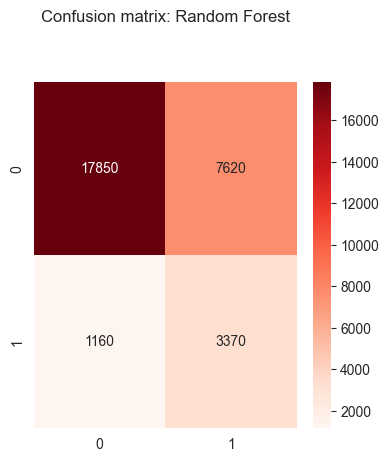

In [101]:
### Evaluating the random forest model on test data
RF_preds =  RF_model.predict(X_test_sc)
# measure the model performance
model_performance(y_test,RF_preds, 'Random Forest')

#### explanation of results (RANDOM FOREST)
The model has
<li>Balanced Accuracy(0.722) depicting that Random Forest fairly performs well both on predicting minority and Majority (defaults and non-defaults).</li>

<li> AUC (0.722) shows that the model is fairly capable enough of distinguishing between the defaults and non-defaults</li>
<li> Precision(0.306) signify that the model perofmrs poorly in predicting defaults(class 1) instances</li>
<li>Recall/Sensitivity (0.74) proves that the model is perfoming relevently better on identifying positive(defaults) class1 instances</li>
<li>f1_score(0.43) signify poor performance for the model in identifying all positive predictins both True positives and false positives</li>
<li> specificity(0.70) shows that even though we want our model has 70% chances of predicitng a negative instance for each 31% of predicting a positive instances</li>

#### LOGISTIC REGRESSION
<p>Choice of Algorithm:</p>
<li>Simple and Interpretable: Suitable for binary classification problems and provides clear coefficients for feature importance.</li>
<li>Probabilistic Output: Outputs probabilities, allowing for threshold adjustments based on business needs.</li>


<p>Assumptions and Limitations:</p>
<li>Assumptions: Assumes a linear relationship between the independent variables and the log odds of the dependent variable.</li>
<li>Limitations: Sensitive to outliers and can struggle with multicollinearity among features.</li>


In [102]:
#### Logistic regression
LR_model = LogisticRegression(C=10,max_iter=10,penalty='l2',solver='liblinear',tol=0.0001)

## fit the model 
LR_model.fit(X_S_ENN, y_S_ENN)

LogisticRegression(C=10, max_iter=10, solver='liblinear')

Balanced Accuracy score of the model 0.6490896964874922
AREA UNDER THE CURVE(AUC) score of the model 0.649089696487492
Precision score of the model 0.23255813953488372
Recall score of the model 0.7218543046357616
F1 score of the model 0.35178312086493463
Sensitivity score of the model 0.7218543046357616
Speicificity score of the model 0.5763250883392226
Classification report 

              precision    recall  f1-score   support

           0       0.92      0.58      0.71     25470
           1       0.23      0.72      0.35      4530

    accuracy                           0.60     30000
   macro avg       0.58      0.65      0.53     30000
weighted avg       0.82      0.60      0.66     30000



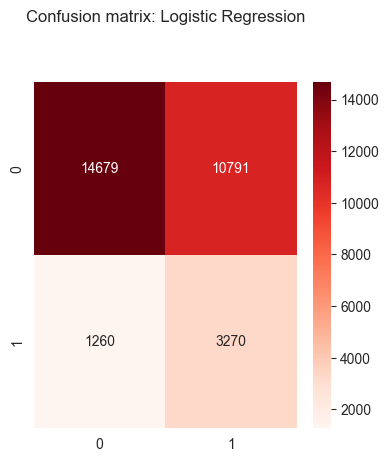

In [103]:
## evaluate logistic regression model
##predict the model
LR_preds = LR_model.predict(X_test_sc)
# measure the model performance
model_performance(y_test,LR_preds, 'Logistic Regression')

explanation of results (Logistic regression)
The model has

<li>Balanced Accuracy0.649) depicting that Logistic Regression fairly performs well both on predicting minority and Majority (defaults and non-defaults).</li>
<li>AUC (0.649) shows that the model is fairly capable enough of distinguishing between the defaults and non-defaults</li>
<li>Precision(0.23) signify that the model perofmrs poorly in predicting defaults(class 1) instances</li>
<li>Recall/Sensitivity (0.722) proves that the model is perfoming relevently better on identifying positive(defaults) class1 instances</li>
<li>f1_score(0.352) signify poor performance for the model in identifying all positive predictins both True positives and false positives</li>
<li>specificity(0.576) shows that even though we want our model has 57.6% chances of predicitng a negative instance for each 23% of predicting a positive instances</li>

#### XGBOOST
<p>Choice of Algorithm:</p>
<li>Gradient Boosting Framework: Combines weak learners (trees) to produce a strong model, often leading to state-of-the-art results in competitions.</li>
<li>Regularization: Includes L1 and L2 regularization to prevent overfitting.</li>


<p>Assumptions and Limitations:</p>
<li>Assumptions: Assumes that the relationship between the features and the outcome can be captured by boosting multiple trees.</li>
<li>Limitations: Can be prone to overfitting if not properly tuned, and requires careful tuning of hyperparameters to achieve optimal performance.</li>


Balanced Accuracy score of the model 0.7544969149525347
AREA UNDER THE CURVE(AUC) score of the model 0.7544969149525347
Precision score of the model 0.42383275261324044
Recall score of the model 0.6713024282560707
F1 score of the model 0.5196070055531824
Sensitivity score of the model 0.6713024282560707
Speicificity score of the model 0.8376914016489988
Classification report 

              precision    recall  f1-score   support

           0       0.93      0.84      0.88     25470
           1       0.42      0.67      0.52      4530

    accuracy                           0.81     30000
   macro avg       0.68      0.75      0.70     30000
weighted avg       0.86      0.81      0.83     30000



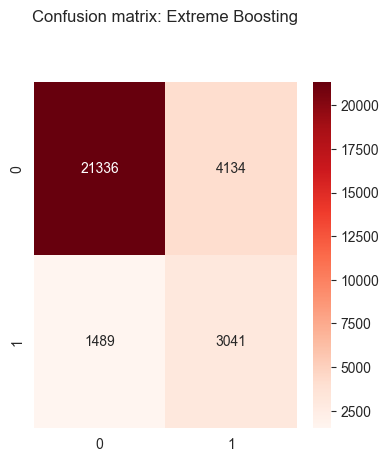

In [104]:
##### Extreme boosting
XGB_model = XGBClassifier(learning_rate = 0.01, max_depth = 6, n_estimators= 200)
XGB_model.fit(X_S_ENN, y_S_ENN)


##predict model
XGB_preds = XGB_model.predict(X_test_sc)

# measure the model performance
model_performance(y_test,XGB_preds, 'Extreme Boosting')

explanation of results (XGBoost)
The model has

<li>Balanced Accuracy(0.754) depicting that XGBoost performs well both on predicting minority and Majority (defaults and non-defaults).</li>
<li>AUC (0.754) shows that the model is fairly capable enough of distinguishing between the defaults and non-defaults</li>
<li>Precision(0.424) signify that the model perofmrs poorly in predicting defaults(class 1) instances</li>
<li>Recall/Sensitivity (0.671) proves that the model is perfoming relevently better on identifying positive(defaults) class1 instances</li>
<li>f1_score(0.520) signify fairly good performance for the model in identifying all positive predictins both True positives and false positives</li>
<li>specificity(0.838) shows that even though we want our model has 83.8% chances of predicitng a negative instance for each 42.4% of predicting a positive instances</li>

#### KNN 
<p>Choice of Algorithm:</p>

<li>Instance-Based Learning: Makes predictions based on the proximity of training instances, making it flexible for various types of data distributions.<li>
    
<li>No Assumptions About Data Distribution: Works well when the decision boundary is not linear.<li>
    
<p>Assumptions and Limitations:</p>
<li>Assumptions: Assumes that similar instances are located close to each other in feature space.</li>
<li>Limitations: Sensitive to irrelevant features and requires proper feature scaling. Computationally expensive for large datasets since it requires calculating distances to all training samples.</li>


Balanced Accuracy score of the model 0.7356791654641092
AREA UNDER THE CURVE(AUC) score of the model 0.735679165464109
Precision score of the model 0.36009227220299883
Recall score of the model 0.6891832229580573
F1 score of the model 0.473030303030303
Sensitivity score of the model 0.6891832229580573
Speicificity score of the model 0.782175107970161
Classification report 

              precision    recall  f1-score   support

           0       0.93      0.78      0.85     25470
           1       0.36      0.69      0.47      4530

    accuracy                           0.77     30000
   macro avg       0.65      0.74      0.66     30000
weighted avg       0.85      0.77      0.79     30000



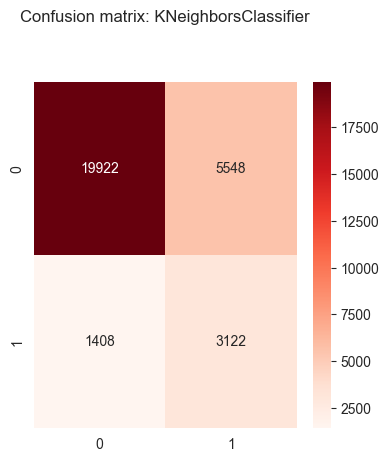

In [105]:
##### KNeighborsClassifier
KNN_model = KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights= 'distance')
KNN_model.fit(X_S_ENN, y_S_ENN)


##predict model
KNN_preds = KNN_model.predict(X_test_sc)

# measure the model performance
model_performance(y_test,KNN_preds, 'KNeighborsClassifier')

explanation of results (KNN)
The model has

<li>Balanced Accuracy (0.736) depicting that KNN fairly performs well both on predicting minority and Majority (defaults and non-defaults).</li>
<li>AUC (0.736) shows that the model is fairly capable enough of distinguishing between the defaults and non-defaults</li>
<li>Precision(0.360) signify that the model perofmrs poorly in predicting defaults(class 1) instances</li>
<li>Recall/Sensitivity (0.689) proves that the model is perfoming relevently better on identifying positive(defaults) class1 instances</li>
<li>f1_score(0.473) signify poor performance for the model in identifying all positive predictins both True positives and false positives</li>
<li>specificity(0.78) shows that even though we want our model has 78% chances of predicitng a negative instance for each 30.6% of predicting a positive instances</li>

#### Decision Tree

<p>Choice of Algorithm:</p>

<li>Intuitive and Simple: Easy to visualize and interpret, making it suitable for initial explorations of the dataset.</li>
<li>Non-linear Relationships: Can capture complex relationships in data without requiring feature scaling.</li>

<p>Assumptions and Limitations:</p>
<li>Assumptions: Assumes that the data can be split into distinct categories or outcomes through decision boundaries.</li>
<li>Limitations: Prone to overfitting, especially with deep trees, and can be unstable with small changes in the data.</li>


Balanced Accuracy score of the model 0.762947968912914
AREA UNDER THE CURVE(AUC) score of the model 0.7629479689129139
Precision score of the model 0.5241697416974169
Recall score of the model 0.6271523178807947
F1 score of the model 0.5710552763819096
Sensitivity score of the model 0.6271523178807947
Speicificity score of the model 0.8987436199450334
Classification report 

              precision    recall  f1-score   support

           0       0.93      0.90      0.91     25470
           1       0.52      0.63      0.57      4530

    accuracy                           0.86     30000
   macro avg       0.73      0.76      0.74     30000
weighted avg       0.87      0.86      0.86     30000



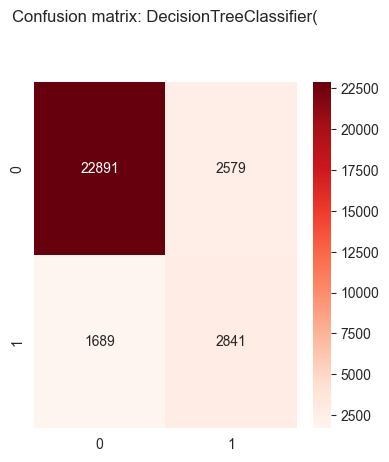

In [106]:
##### DecisionTreeClassifier(
DT_model = DecisionTreeClassifier(criterion='gini',max_depth= 20,min_samples_leaf = 10,min_samples_split= 100)
DT_model.fit(X_S_ENN, y_S_ENN)


##predict model
DT_preds = DT_model.predict(X_test_sc)

# measure the model performance
model_performance(y_test,DT_preds, 'DecisionTreeClassifier')

explanation of results (Decision Tree)
The model has

<li>Balanced Accuracy(0.763) depicting that Decision Tree classifier performs well both on predicting minority and Majority (defaults and non-defaults).</li>
<li>AUC (0.763) signify a good model capable enough of distinguishing between the defaults and non-defaults</li>
<li>Precision(0.524) signify that the model perofmrs fairly good in predicting defaults(class 1) instances</li>
<li>Recall/Sensitivity (0.627) proves that the model is perfoming relevently better on identifying positive(defaults) class1 instances</li>
<li>f1_score(0.571) signify a fairly good performance for the model in identifying all positive predictins both True positives and false positives</li>
<li>specificity(0.899) shows that even though we want our model has 89.9% chances of predicitng a negative instance for each 52.4% of predicting a positive instances</li>

#### conclussion

Among all 5 models decision tree classifier performs better than the other 4, thus decision tree will be used for deployment

In [107]:
# save the model to disk
import pickle
filename = 'decisiontree.sav'
pickle.dump(DT_model, open(filename, 'wb'))

In [108]:
### Building predictive system

input_data = (1, 1, 2, 1, 3000, 0, 200, 0.05, 30, 12, 6000, 1)
input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = DT_model.predict(input_data_reshaped)

print(prediction)

if(prediction[0]==0):
    print("The Person is likely not to default payment")
else:
    print("The Person is likely to default Loan Payment")

[1]
The Person is likely to default Loan Payment


#### MODEL ANALYSIS

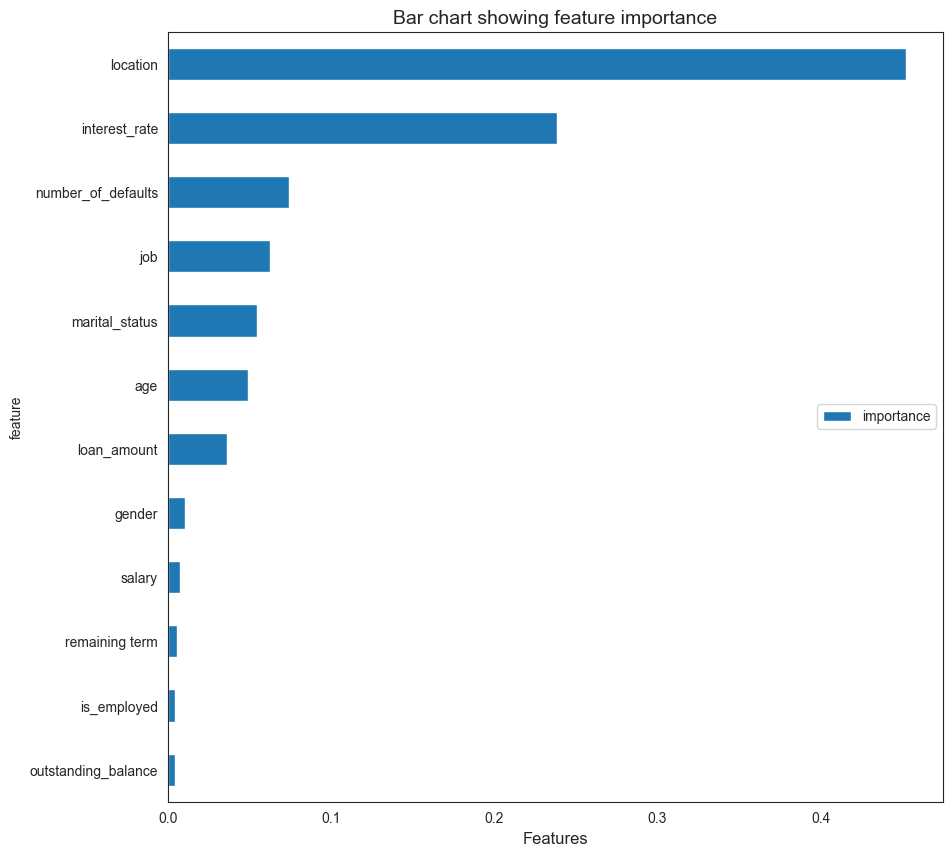

In [110]:
# Feature importance for the model 
impo_df = pd.DataFrame({'feature': X_S_ENN.columns, 'importance': DT_model.feature_importances_}).set_index('feature').sort_values(by = 'importance', ascending = False)
impo_df = impo_df.sort_values(by = 'importance', ascending = True)
impo_df.plot(kind = 'barh', figsize = (10, 10))
plt.legend(loc = 'center right')
plt.title('Bar chart showing feature importance', fontsize = 14)
plt.xlabel('Features', fontsize = 12)
plt.show()

In [111]:
impo_df

,importance
feature,
outstanding_balance,0.004181
is_employed,0.004420
remaining term,0.005666
salary,0.007426
gender,0.010356
loan_amount,0.036203
age,0.048903
marital_status,0.054553
job,0.062931


Interpretation: Location has a strong positive effect, as compared to other features impacts the probability of the target class.

### INSTANCES WHERE THE MODEL PERFORMS POORLY

<li> Based on the confusion matrix of the decision tree, the  model perform poorly in the event where it is biased towards the negative class(0) and also the model struggles with false negatives indicating it may fail to identify positive class(1) effectively

Balanced Accuracy score of the model 0.762947968912914
AREA UNDER THE CURVE(AUC) score of the model 0.7629479689129139
Precision score of the model 0.5241697416974169
Recall score of the model 0.6271523178807947
F1 score of the model 0.5710552763819096
Sensitivity score of the model 0.6271523178807947
Speicificity score of the model 0.8987436199450334
Classification report 

              precision    recall  f1-score   support

           0       0.93      0.90      0.91     25470
           1       0.52      0.63      0.57      4530

    accuracy                           0.86     30000
   macro avg       0.73      0.76      0.74     30000
weighted avg       0.87      0.86      0.86     30000



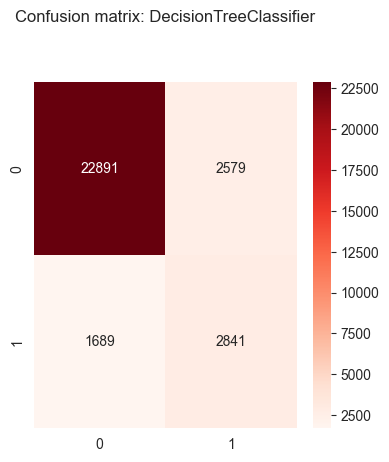

In [115]:
### Analyze the model for biases in predictions 
# measure the model performance
model_performance(y_test,DT_preds, 'DecisionTreeClassifier')


<li> Based on the confusion matrix of the decision tree, the  model perform poorly in the event where it is biased towards the negative class(0) and also the model struggles with false negatives indicating it may fail to identify positive class(1) effectively

##### hOW THE MODEL MAKEES PREDICTIONS
<li> The tree starts at the root node, which represents the input data</li>
<li> The tree selects a feature to split on, based on gini impurity</li>
<li> The tree splits the data into the child nodes based on the slected feature and a threshold value</li>
<li> The tree recursively repeats the steps(2-3) for each child node until a stopping criterion is reached</li>
<li> The tree predicts the Loan Status class for a new instance by traversing the tree from the root node to a leaf node</li>
<li> The leaf node contains the predicted class label</li> 

Acknowledging Situations of Poor Performance
<li>Data Drift: The model may struggle with changing data distributions over time, leading to decreased accuracy.</li>
<li>Imbalanced Classes: If one class significantly outnumbers another, the model may bias towards the majority class, leading to poor performance on minority classes.</li>
<li>Overfitting: Complex models  may overfit to training data, capturing noise instead of the underlying patterns.</li>
<li> Limited Experimentation and Hyperparameter Tuning: Acknowledging the constraints of the conducted experiments, it's clear that both models have not undergone an all possible space of hyperparameter settings. Further fine-tuning could potentially enhance their predictive capabilities.</li>


Model Improvement Strategies
<li>Regular Retraining: Implement automated retraining pipelines to update the model with new data periodically, helping to combat data drift.</li>
<li>Feature Engineering: Invest in better feature selection or engineering to capture more relevant information, possibly through domain knowledge.</li>
<li>Model Ensemble: Combine multiple models to improve robustness and generalization, leveraging techniques like stacking or blending.</li>
<li> Designing of better data balancing techniques</li>


Business Implications of Findings
<li> The findings highlight the needs for better data collection especially considering the fact of some categoiries in data</li>
<li>The model indicates that location contributes more to whether an individual defaults payments or not, therefore the businee should refine its marketing strategies of its loans to those cities where defaults are less</li>
<li>The business should reduce its interest rates as they tend to affect the ability of an individual repaying the Loan</li>

In [124]:
# Initialize dictionary to hold baseline distributions
baseline_distributions = {}

# For each column going to compute statistics
for column in encoded_df.columns:
    if encoded_df[column].dtype == 'object':  # Categorical data
        baseline_distributions[column] = encoded_df[column].value_counts().to_dict()
    else:  # Continuous data
        baseline_distributions[column] = {
            'mean': encoded_df[column].mean(),
            'std':encoded_df[column].std()
        }

In [125]:
import pickle

# Saveing baseline distributions
with open('baseline_distributions.pkl', 'wb') as f:
    pickle.dump(baseline_distributions, f)
